# CLASIFICACIÓN DE SOLICITUDES DE CRÉDITO UTILIZANDO DEEP LEARNING

## MODELOS DE CLASIFICACIÓN

In [5]:
import warnings
warnings.filterwarnings("ignore")

## Importe librerías

In [6]:
import pandas as pd
import numpy as np

In [7]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px

In [8]:
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import average_precision_score

from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing 

## Importe de datos

Los datos se importan desde el NOTEBOOK preprocesamiento

In [9]:
df = pd.read_pickle('HCData.pkl')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_EMPLOYED,DAYS_REGISTRATION,...,PCB_Canceled,PCB_Demand,PCB_Returned_store,PCB_Signed,pcb_FUTURE_mean,pcb_FUTURE_min,pcb_FUTURE_max,pcb_DPD_mean,pcb__DPD_min,pcb__DPD_max
0,100043,0,1,1,0,1,198000.0,641173.5,-768,-63.0,...,0,0,0,0,34.324324,0.0,60.0,0.0,0,0
1,100043,0,1,1,0,1,198000.0,641173.5,-768,-63.0,...,0,0,0,0,34.324324,0.0,60.0,0.0,0,0
2,100048,0,1,1,0,1,202500.0,604152.0,-475,-3148.0,...,0,0,0,0,13.437500,0.0,18.0,0.0,0,0
3,100050,0,1,1,0,1,108000.0,746280.0,365243,-5745.0,...,0,0,0,0,16.500000,9.0,24.0,0.0,0,0
4,100050,0,1,1,0,1,108000.0,746280.0,365243,-5745.0,...,0,0,0,0,16.500000,9.0,24.0,0.0,0,0


In [17]:
df.shape

(176688, 191)

In [10]:
dfD = pd.get_dummies(df.CREDIT_ACTIVE)

In [11]:
dfD = dfD.rename({
    "Active":'TT_CREDIT_ACTIVE_Active',
    "Closed":'TT_CREDIT_ACTIVE_Closed',
    "Sold":'TT_CREDIT_ACTIVE_Sold'
})

dfD = dfD.drop(['Bad debt'], axis = 1)

df = pd.concat([df, dfD], axis = 1)

In [12]:
df = df.drop(['CREDIT_ACTIVE'], axis = 1)

## Definición de conjuntos Y y X

In [13]:
Y = df.TARGET
X = df.drop(['TARGET', 'SK_ID_CURR'], axis = 1)

## Perfiles de Usuario

In [14]:
# normalizar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

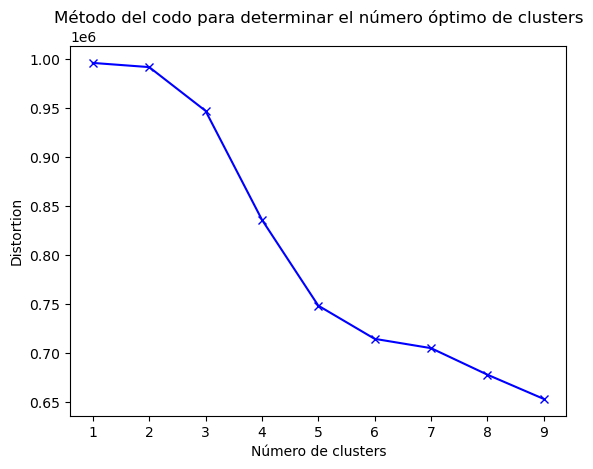

In [11]:
#*Método del codo:*

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Graficar la variación de la suma de distancias en función del número de clusters
plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Distortion')
plt.title('Método del codo para determinar el número óptimo de clusters')
plt.show()

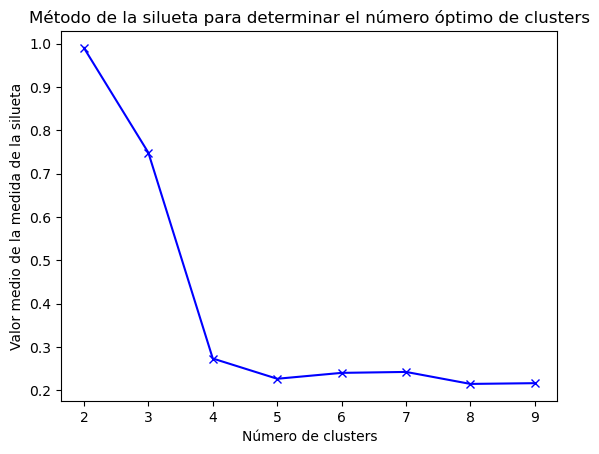

In [19]:
#*Método de la silueta:*

from sklearn.metrics import silhouette_score

# Evaluar la calidad del clustering utilizando el método de la silueta
silhouette_scores = []
K = range(2,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Graficar la variación del valor medio de la medida de la silueta en función del número de clusters
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Valor medio de la medida de la silueta')
plt.title('Método de la silueta para determinar el número óptimo de clusters')
plt.show()

In [ ]:
#%pip install gap-stat

In [ ]:
#*Método de la gap statistic:*

"""from scipy.spatial.distance import cdist
from gap_statistic import OptimalK

# Calcular la medida de la gap statistic para diferentes valores de k
optimalK = OptimalK(n_jobs=-1)
n_clusters = optimalK(X, cluster_array=np.arange(1, 10))
print('Número óptimo de clusters:', n_clusters)

# Graficar la variación de la medida de la gap statistic en función del número de clusters
gap_df = optimalK.gap_df_
plt.plot(gap_df.n_clusters, gap_df.gap_value, linestyle='--', marker='o', color='b')
plt.ylabel('Gap Value')
plt.xlabel('Número de clusters')
plt.title('Método de la gap statistic para determinar el número óptimo de clusters')
plt.show()"""

In [15]:
#KMEANS
from sklearn.cluster import KMeans
# entrenar modelo k-means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# obtener etiquetas de cluster y centroides
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [16]:
clusters = pd.DataFrame(labels, 
                    columns=['CLUSTER'])
clusters.head()

,CLUSTER
0,0
1,0
2,3
3,3
4,3


In [21]:
#df = df.drop(df.CLUSTER, axis = 1)
#df.head()

## PCA

In [17]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [18]:
# PCA
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(X)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

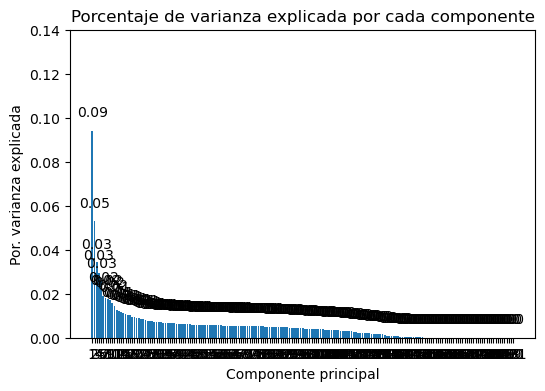

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(X.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 0.14)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.09411725 0.1470073  0.18122922 0.21056426 0.2363638  0.25543551
 0.27356175 0.29133649 0.30835499 0.32413768 0.33876396 0.3512113
 0.36356644 0.37527301 0.38632746 0.39731796 0.40786353 0.41804678
 0.42760746 0.43700181 0.44612998 0.45492135 0.46358287 0.47220089
 0.48047285 0.4882508  0.49577137 0.50314811 0.51038386 0.51755563
 0.52462185 0.53163064 0.53850343 0.54526781 0.55198433 0.55866726
 0.56526848 0.57182915 0.57828913 0.58465428 0.59092755 0.59715183
 0.60325653 0.60934468 0.61537299 0.62137109 0.62736007 0.63325603
 0.63914707 0.64500704 0.65084763 0.65664802 0.66239336 0.66812852
 0.67380726 0.67944024 0.6850566  0.69066022 0.69622695 0.70177538
 0.70730136 0.71280866 0.71830264 0.72378075 0.72923766 0.73468457
 0.74012711 0.74553522 0.75093545 0.75632377 0.76165675 0.76696577
 0.77225974 0.77750464 0.78272504 0.78790692 0.7930606  0.79818882
 

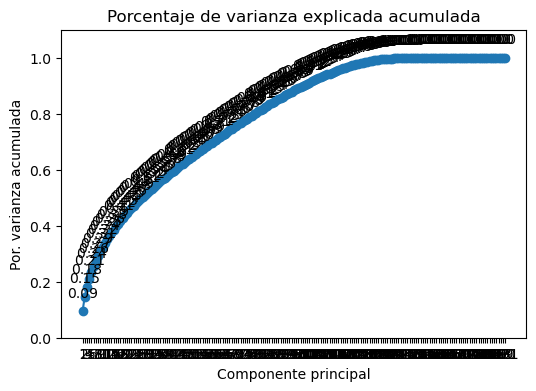

In [185]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(X.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(X.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

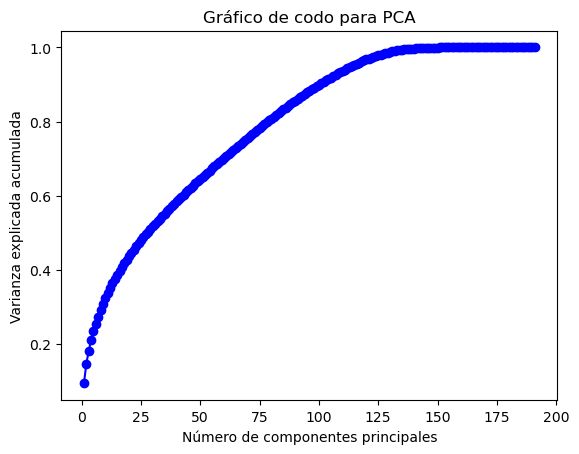

In [186]:
#pca = PCA()

# ajustar PCA a los datos
#pca.fit(X)

variance_ratio = modelo_pca.explained_variance_ratio_

# calcular la suma acumulativa de la varianza explicada
cumulative_variance_ratio = [sum(variance_ratio[:i+1]) for i in range(len(variance_ratio))]

# crear el gráfico de codo
fig, ax = plt.subplots()
ax.plot(range(1, len(cumulative_variance_ratio)+1), cumulative_variance_ratio, 'bo-')
ax.set_xlabel('Número de componentes principales')
ax.set_ylabel('Varianza explicada acumulada')
ax.set_title('Gráfico de codo para PCA')

plt.show()

In [19]:
valores_propios_df = pd.DataFrame({'Componente': range(1, modelo_pca.n_components_+1),
                                   'Valor propio': modelo_pca.explained_variance_})

In [16]:
len(valores_propios_df[valores_propios_df['Valor propio'] > 1])

62

In [17]:
valores_propios_df[valores_propios_df['Valor propio'] > 1]

,Componente,Valor propio
0,1,17.129437
1,2,9.626042
2,3,6.228425
3,4,5.339008
4,5,4.695542
...,...,...
57,58,1.019864
58,59,1.013150
59,60,1.009820
60,61,1.005734


In [20]:
X_transformado = modelo_pca.transform(X)[:, :62]

In [21]:
XPCA = pd.DataFrame(X_transformado, 
                    columns=['COMP1', 'COMP2','COMP3','COMP4','COMP5','COMP6','COMP7','COMP8','COMP9','COMP10',
                            'COMP11', 'COMP12','COMP13','COMP14','COMP15','COMP16','COMP17','COMP18','COMP19','COMP20',
                            'COMP21', 'COMP22','COMP23','COMP24','COMP25','COMP26','COMP27','COMP28','COMP29','COMP30',
                            'COMP31', 'COMP32','COMP33','COMP34','COMP35','COMP36','COMP37','COMP38','COMP39','COMP40',
                            'COMP41', 'COMP42','COMP43','COMP44','COMP45','COMP46','COMP47','COMP48','COMP49','COMP50',
                            'COMP51', 'COMP52','COMP53','COMP54','COMP55','COMP56','COMP57','COMP58','COMP59','COMP60',
                            'COMP61', 'COMP62'])
XPCA.head()

,COMP1,COMP2,COMP3,COMP4,COMP5,COMP6,COMP7,COMP8,COMP9,COMP10,...,COMP53,COMP54,COMP55,COMP56,COMP57,COMP58,COMP59,COMP60,COMP61,COMP62
0,235459.914914,-210110.320070,-600055.558625,193618.607120,405119.850054,-609681.764653,-217628.035838,330298.209507,203800.814835,400995.924875,...,684517.409590,854946.718631,325191.073854,-425769.935116,90862.073507,-514884.552107,99903.594348,-411670.914943,-164676.893812,633269.867058
1,237223.963550,-208248.287409,-590531.997705,207623.101643,403577.970349,-606210.242173,-207920.375445,318244.610521,200662.322789,382778.344477,...,697151.244588,849223.112939,326016.763970,-430065.506275,84791.862652,-501395.244253,103691.345450,-423794.206333,-151386.885642,649255.793213
2,131640.360861,-128759.328878,-312622.363222,114354.074298,196317.293287,-345058.573942,-125756.778968,202291.677606,105388.639714,212067.414609,...,575127.854039,734498.444983,245997.428453,-385102.656172,72034.463984,-434681.250820,101581.963688,-345351.889623,-158432.801361,551469.160865
3,45653.029601,-76144.700820,-105180.641276,63602.531703,-56990.431474,-214957.978331,-7651.579633,48300.471374,35628.464249,77533.821964,...,653746.143517,894961.304074,239972.443023,-471360.238190,74735.212999,-526351.625462,133355.763687,-370190.485713,-226929.298836,649869.184435
4,45802.242140,-75967.684161,-104265.377086,65028.386670,-57090.222794,-214597.386237,-6761.854534,47215.732235,35330.413863,75718.087769,...,653354.808096,895589.373003,240386.872188,-470987.512148,73869.865410,-524931.461969,133951.883253,-371530.157012,-225716.515700,651650.284456


In [22]:
XPCA = pd.concat([XPCA, clusters], axis = 1)

## Creación de conjuntos Training y Testing

### se extrae una muestra del conjunto de X

In [169]:
Z = 1.96
P = Y.mean()
Q = 1- P
N = len(X)
e = 0.05

In [175]:
(Z*Z)*P*Q / (e*e)

122.05685183999996

In [176]:
(Z*Z)*Q / (e*e)*P

122.05685183999996

In [41]:
#10000 - 3.3 
#round(len(df1)/2) x 
(round(len(df1)/2) * 3.3) / 10000

29.15352

In [23]:
df1 = pd.concat([XPCA, df.TARGET], axis = 1)
#df1 = df1.sample(n = 25000, random_state= 22)
X = df1.drop(['TARGET'], axis = 1)
Y = df1.TARGET

dfSVM = df1.sample(n = 2000, random_state= 22)
XSVM = dfSVM.drop(['TARGET'], axis = 1)
YSVM = dfSVM.TARGET

len(clusters)

df = pd.concat([df, clusters], axis = 1)

df.CLUSTER.value_counts()

X = df1.drop(['TARGET'], axis = 1)
Y = df1.TARGET

X.head()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=22, stratify = Y)

X_trainSVM, X_testSVM, y_trainSVM, y_testSVM = train_test_split(XSVM, YSVM, random_state=22, stratify = YSVM)

In [25]:
Cluster_train = X_train.CLUSTER
Cluster_test = X_test.CLUSTER

X_train = X_train.drop(['CLUSTER'], axis = 1)  
X_test = X_test.drop(['CLUSTER'], axis = 1)

Cluster_trainSVM = X_trainSVM.CLUSTER
Cluster_testSVM = X_testSVM.CLUSTER

X_trainSVM = X_trainSVM.drop(['CLUSTER'], axis = 1)  
X_testSVM = X_testSVM.drop(['CLUSTER'], axis = 1)

In [190]:
print("X_train :", len(X_train))
print("y_train :", len(y_train))
print("X_test :", len(X_test))
print("y_test :", len(y_test))

X_train : 132516
y_train : 132516
X_test : 44172
y_test : 44172


In [157]:
print("%TARGET_Y", Y.mean())
print("%TARGET_Y_train", y_train.mean())
print("%TARGET_Y_test", y_test.mean())

%TARGET_Y 0.08875532011228833
%TARGET_Y_train 0.08875154698300583
%TARGET_Y_test 0.08876663950013583


In [158]:
X.CLUSTER.value_counts()

3    74114
1    44915
0    43892
2    13767
Name: CLUSTER, dtype: int64

In [184]:
Cluster_train.value_counts() / len(Cluster_train)

3    0.419693
1    0.254007
0    0.248106
2    0.078194
Name: CLUSTER, dtype: float64

In [185]:
Cluster_test.value_counts() / len(Cluster_test)

3    0.418772
1    0.254799
0    0.249343
2    0.077085
Name: CLUSTER, dtype: float64

In [186]:
X_train.columns.values

array(['COMP1', 'COMP2', 'COMP3', 'COMP4', 'COMP5', 'COMP6', 'COMP7',
       'COMP8', 'COMP9', 'COMP10', 'COMP11', 'COMP12', 'COMP13', 'COMP14',
       'COMP15', 'COMP16', 'COMP17', 'COMP18', 'COMP19', 'COMP20',
       'COMP21', 'COMP22', 'COMP23', 'COMP24', 'COMP25', 'COMP26',
       'COMP27', 'COMP28', 'COMP29', 'COMP30', 'COMP31', 'COMP32',
       'COMP33', 'COMP34', 'COMP35', 'COMP36', 'COMP37', 'COMP38',
       'COMP39', 'COMP40', 'COMP41', 'COMP42', 'COMP43', 'COMP44',
       'COMP45', 'COMP46', 'COMP47', 'COMP48', 'COMP49', 'COMP50',
       'COMP51', 'COMP52', 'COMP53', 'COMP54', 'COMP55', 'COMP56',
       'COMP57', 'COMP58', 'COMP59', 'COMP60', 'COMP61', 'COMP62'],
      dtype=object)

## Balanceo del conjunto de entrenamiento

In [76]:
#%pip install imblearn

In [26]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter

In [37]:
# Supongamos que el dataframe se llama df
mask = X_train.dtypes == 'object'
df_object = X_train.loc[:, mask]
print(df_object)

Empty DataFrame
Columns: []
Index: [100279, 146659, 49340, 34760, 79675, 146630, 138782, 67843, 109117, 83165, 153437, 147239, 74829, 132595, 141531, 106577, 169232, 1665, 53684, 20580, 158567, 18189, 34015, 2646, 50316, 50407, 3757, 160117, 51294, 125955, 93329, 115619, 69053, 107213, 83436, 93675, 102362, 98300, 144016, 136677, 32148, 4641, 115907, 53904, 90835, 163958, 109371, 96589, 75726, 54792, 107611, 65004, 41929, 162901, 156832, 77421, 63569, 63240, 81915, 143205, 107372, 126726, 156906, 153703, 22105, 89660, 95308, 92783, 47780, 10104, 173572, 72619, 34931, 869, 101826, 85584, 27567, 153134, 143556, 135962, 81766, 76413, 77534, 98079, 169265, 74455, 2715, 57434, 79077, 121354, 21127, 85294, 53990, 117772, 93704, 148902, 19388, 171595, 8345, 149138, ...]

[750 rows x 0 columns]


# Aplicar SMOTE
sm = SMOTE(random_state=110322)
X_trainSVM, y_trainSVM = sm.fit_resample(X_trainSVM, y_trainSVM)

In [27]:
# Aplicar SMOTE
sm = SMOTE(random_state=110322)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [87]:
print(y_train.mean())
print(len(y_train))
print(len(X_train))

0.5
241510
241510


# optimización bayesiana

In [67]:
#%pip install hyperopt
#%pip install baytune
#%pip install scikit-optimize

In [29]:
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV


@book{thakur2020approaching,
  title={Approaching (almost) any machine learning problem},
  author={Thakur, Abhishek},
  year={2020},
  publisher={Abhishek Thakur}
}

## REGRESIÓN LOGÍSTICA

In [56]:
# Definir el modelo de regresión logística
logred = LogisticRegression()

In [57]:
# Definir el espacio de búsqueda de hiperparámetros
search_space_logred = {
    'penalty': ['l2','none'],
    'C': (1e-3, 1e+3, 'log-uniform'),
    'fit_intercept': [True, False],
    #'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter': (1000, 5000)
}

In [58]:
# Definir la función de optimización bayesiana
bayes_cv_logred = BayesSearchCV(
    logred,
    search_space_logred,
    n_iter=50, # número de iteraciones de optimización
    cv=5, # número de pliegues de validación cruzada
    n_jobs=-1, # número de núcleos de CPU para utilizar (-1 para usar todos los núcleos disponibles)
    scoring = 'roc_auc'
)


In [59]:
import time
start_time = time.time()

In [60]:
# Ejecutar la optimización bayesiana de hiperparámetros
end_time = time.time()
execution_time = end_time - start_time

bayes_cv_logred.fit(X_train, y_train)

print("Tiempo de ejecución:", execution_time, "segundos")

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

Tiempo de ejecución: 2.400789260864258 segundos


In [61]:
# Imprimir los hiperparámetros óptimos y la puntuación de validación cruzada
print('Los hiperparámetros óptimos son:', bayes_cv_logred.best_params_)
print('La puntuación de validación cruzada con los hiperparámetros óptimos es:', bayes_cv_logred.best_score_)


Los hiperparámetros óptimos son: OrderedDict([('C', 1000.0), ('fit_intercept', True), ('max_iter', 5000), ('penalty', 'none')])
La puntuación de validación cruzada con los hiperparámetros óptimos es: 0.6434665526827906


In [62]:
print("Test-set score: {:.6f}".format(bayes_cv_logred.score(X_test, y_test)))

Test-set score: 0.633624


In [63]:
y_pred_logred = bayes_cv_logred.predict(X_test)

In [64]:
import pickle
with open('bayes_cv_logred.pkl', 'wb') as archivo:
    pickle.dump(bayes_cv_logred, archivo)

In [28]:
import pickle

with open('bayes_cv_logred.pkl', 'rb') as archivo:
    bayes_cv_logred = pickle.load(archivo)
bayes_cv_logred

BayesSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
              scoring='roc_auc',
              search_spaces={'C': (0.001, 1000.0, 'log-uniform'),
                             'fit_intercept': [True, False],
                             'max_iter': (1000, 5000),
                             'penalty': ['l2', 'none']})

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn import model_selection

## RANDOM FOREST

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
# Definir el pipeline con un clasificador de bosques aleatorios
rf = RandomForestClassifier()

In [41]:
# Definir el pipeline con un clasificador de bosques aleatorios
pipeline_rf = Pipeline([
    ('rf', RandomForestClassifier())
])


In [42]:
search_space_rf = {
    'rf__n_estimators': (10, 100),
    'rf__max_depth': (1, 50),
    'rf__max_features': (0.1, 1.0),
    #'rf__min_samples_split': (2, 10),
    #'rf__min_samples_leaf': (1, 10)
}

In [43]:
# Definir la función de optimización bayesiana
bayes_cv_rf = BayesSearchCV(
    pipeline_rf,
    search_space_rf,
    n_iter=50, # número de iteraciones de optimización
    cv=5, # número de pliegues de validación cruzada
    n_jobs=-1, # número de núcleos de CPU para utilizar (-1 para usar todos los núcleos disponibles)
    scoring = 'roc_auc'
)

In [44]:
%%time
bayes_cv_rf.fit(X_train, y_train)

CPU times: user 7min 40s, sys: 13min 28s, total: 21min 9s
Wall time: 10h 6min 55s


BayesSearchCV(cv=5,
              estimator=Pipeline(steps=[('rf', RandomForestClassifier())]),
              n_jobs=-1, scoring='roc_auc',
              search_spaces={'rf__max_depth': (1, 50),
                             'rf__max_features': (0.1, 1.0),
                             'rf__n_estimators': (10, 100)})

In [45]:
# Imprimir los hiperparámetros óptimos y la puntuación de validación cruzada
print('Los hiperparámetros óptimos son:', bayes_cv_rf.best_params_)
print('La puntuación de validación cruzada con los hiperparámetros óptimos es:',  bayes_cv_rf.best_score_)

Los hiperparámetros óptimos son: OrderedDict([('rf__max_depth', 50), ('rf__max_features', 0.1), ('rf__n_estimators', 100)])
La puntuación de validación cruzada con los hiperparámetros óptimos es: 0.9991945454852281


In [46]:
print("Test-set score: {:.6f}".format(bayes_cv_rf.score(X_test, y_test)))

Test-set score: 0.962527


In [47]:
y_pred_bayes_rf = bayes_cv_rf.predict(X_test) 

In [48]:
import pickle 
with open('bayes_cv_rf.pkl', 'wb') as archivo:
    pickle.dump(bayes_cv_rf, archivo)

## XGBoost

In [207]:
#%pip install xgboost

In [25]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler

In [26]:
# Definir el modelo XGBoost
model_xgb = XGBClassifier()

In [27]:
# Definir el espacio de búsqueda de hiperparámetros
# Definir el espacio de búsqueda de hiperparámetros
search_space_xgb = {
    'learning_rate': (0.01, 1.0, 'log-uniform'),
    'min_child_weight': (0, 10),
    'max_depth': (1, 50, 'uniform'),
    'max_delta_step': (0, 10),
    'subsample': (0.01, 1.0, 'uniform'),
    'colsample_bytree': (0.01, 1.0, 'uniform'),
    'colsample_bylevel': (0.01, 1.0, 'uniform'),
    #'reg_lambda': (1e-9, 1000, 'log-uniform'),
    'reg_alpha': (1e-9, 1.0, 'log-uniform'),
    'gamma': (1e-9, 0.5, 'log-uniform'),
    #'min_child_samples': (0, 50)
}
#xgb_grid_search = GridSearchCV(pipeline_xgb, param_grid=param_grid_xgb, cv=cv, scoring='roc_auc')

In [30]:
# Definir la función de optimización bayesiana
bayes_cv_xgb = BayesSearchCV(
    model_xgb,
    search_space_xgb,
    n_iter=50, # número de iteraciones de optimización
    cv=5, # número de pliegues de validación cruzada
    n_jobs=-1, # número de núcleos de CPU para utilizar (-1 para usar todos los núcleos disponibles)
    scoring='roc_auc'
)

In [31]:
%%time
# ajusta el modelo con los datos
bayes_cv_xgb.fit(X_train, y_train)

CPU times: user 45min 9s, sys: 20min 47s, total: 1h 5min 57s
Wall time: 5h 19min 19s


BayesSearchCV(cv=5,
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, gpu_id=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate=None...
              n_jobs=-1, scoring='roc_auc',
              search_spaces={'colsample_bylevel': (0.01, 1.0, 'uniform'),
                             'colsample_bytree': (0.01, 1.0, 'uniform'),
                             'gamma': (1e-09, 0.5, 'log-uniform'),
                             'learning_rate': (0.01, 1.0, 'log-uniform'),
                             'max_delta_step': (0, 10),
                             'max_depth': (1, 50, 'uniform'),
                             'min_child_weight': (0, 10),
                             'reg_alpha': (1e-09, 1.0, 'log-uniform'),
                             'subsample': (0.01, 1.0, 'uniform')})

In [32]:
# imprime los resultados
print("Mejores parámetros encontrados: ", bayes_cv_xgb.best_params_)
print("Mejor score: ", bayes_cv_xgb.best_score_)

Mejores parámetros encontrados:  OrderedDict([('colsample_bylevel', 1.0), ('colsample_bytree', 0.3446549914637888), ('gamma', 2.7113150628751984e-09), ('learning_rate', 0.0829881400418697), ('max_delta_step', 3), ('max_depth', 50), ('min_child_weight', 3), ('reg_alpha', 4.008413031360492e-09), ('subsample', 1.0)])
Mejor score:  0.9990657982551745


In [33]:
print("Test-set score: {:.6f}".format(bayes_cv_xgb.score(X_test, y_test)))

Test-set score: 0.959100


In [34]:
y_pred_bayes_xgb = bayes_cv_xgb.predict(X_test)

In [36]:
import pickle 
with open('bayes_cv_xgb.pkl', 'wb') as archivo:
    pickle.dump(bayes_cv_xgb, archivo)

## CatBoost

In [217]:
#%pip install catboost

In [27]:
from catboost import CatBoostClassifier

In [28]:
# Definir el modelo CatBoost
cb = CatBoostClassifier()

In [29]:
# Definir el espacio de búsqueda de hiperparámetros
search_space_cb = {
    'learning_rate': (0.01, 0.1, 'log-uniform'),
    'max_depth': (1, 10),
#   'l2_leaf_reg': (1e-9, 1000, 'log-uniform'),  # Ampliado el límite superior
    #'subsample': (0.01, 1.0, 'uniform'),
    #'colsample_bylevel': (0.01, 1.0, 'uniform'),
    #'min_child_samples': (0, 50)
}

In [30]:
# Definir la función de optimización bayesiana
bayes_cb = BayesSearchCV(
    cb,
    search_space_cb,
    n_iter=10, # número de iteraciones de optimización
    cv=5, # número de pliegues de validación cruzada
    n_jobs=-1, # número de núcleos de CPU para utilizar (-1 para usar todos los núcleos disponibles)
    #verbose = 0,
    scoring = 'roc_auc'
)


In [31]:
%%time
# Ejecutar la optimización bayesiana de hiperparámetros
bayes_cb.fit(X_train, y_train, verbose = False)

# Imprimir los hiperparámetros óptimos y la puntuación de validación cruzada
print('Los hiperparámetros óptimos son:', bayes_cb.best_params_)
print('La puntuación de validación cruzada con los hiperparámetros óptimos es:', bayes_cb.best_score_)

Los hiperparámetros óptimos son: OrderedDict([('learning_rate', 0.09131751481162084), ('max_depth', 9)])
La puntuación de validación cruzada con los hiperparámetros óptimos es: 0.9954018572584091
CPU times: user 17min 45s, sys: 1min 3s, total: 18min 48s
Wall time: 37min 51s


In [32]:
print("Test-set score: {:.6f}".format(bayes_cb.score(X_test, y_test)))

Test-set score: 0.941011


In [33]:
y_pred__bayes_cb = bayes_cb.predict(X_test)

In [67]:
with open('bayes_cb.pkl', 'wb') as archivo:
    pickle.dump(bayes_cb, archivo)

## LightGBM

In [224]:
#%pip install lightgbm

In [50]:
from lightgbm import LGBMClassifier

In [51]:
# Definir el modelo LightGBM
lgbm = LGBMClassifier()

# Definir el espacio de búsqueda de hiperparámetros
search_space_lgbm = {
    'learning_rate': (0.01, 1.0, 'log-uniform'),
    'max_depth': (1, 50),
#    'num_leaves': (2, 256),
    #'min_child_samples': (1, 50),  # Modificado el valor mínimo a 1
#    'reg_lambda': (1e-9, 1000, 'log-uniform'),
    'reg_alpha': (1e-9, 1.0, 'log-uniform'),
    'colsample_bytree': (0.01, 1.0, 'uniform'),
    'subsample': (0.01, 1.0, 'uniform')
}

In [52]:
# Definir la función de optimización bayesiana
bayes_cv_lgbm = BayesSearchCV(
    lgbm,
    search_space_lgbm,
    n_iter=50, # número de iteraciones de optimización
    cv=5, # número de pliegues de validación cruzada
    n_jobs=-1, # número de núcleos de CPU para utilizar (-1 para usar todos los núcleos disponibles)
    scoring = 'roc_auc'
)

In [53]:
%%time
# Ejecutar la optimización bayesiana de hiperparámetros
bayes_cv_lgbm.fit(X_train, y_train)

# Imprimir los hiperparámetros óptimos y la puntuación de validación cruzada
print('Los hiperparámetros óptimos son:', bayes_cv_lgbm.best_params_)
print('La puntuación de validación cruzada con los hiperparámetros óptimos es:', bayes_cv_lgbm.best_score_)

Los hiperparámetros óptimos son: OrderedDict([('colsample_bytree', 1.0), ('learning_rate', 1.0), ('max_depth', 44), ('reg_alpha', 1.0), ('subsample', 1.0)])
La puntuación de validación cruzada con los hiperparámetros óptimos es: 0.9572724512228754
CPU times: user 6min 8s, sys: 19min 38s, total: 25min 46s
Wall time: 10min 53s


In [54]:
print("Test-set score: {:.6f}".format(bayes_cv_lgbm.score(X_test, y_test)))

Test-set score: 0.886925


In [55]:
y_pred__bayes_lgbm = bayes_cv_lgbm.predict(X_test)

In [68]:
with open('bayes_cv_lgbm.pkl', 'wb') as archivo:
    pickle.dump(bayes_cv_lgbm, archivo)

## Emsamble Voting Classification

In [50]:
import pickle

with open('bayes_cb.pkl', 'rb') as archivo:
    bayes_cb = pickle.load(archivo)
bayes_cb

BayesSearchCV(cv=5,
              estimator=<catboost.core.CatBoostClassifier object at 0x7f713308dae0>,
              n_iter=10, n_jobs=-1, scoring='roc_auc',
              search_spaces={'learning_rate': (0.01, 0.1, 'log-uniform'),
                             'max_depth': (1, 10)})

In [52]:
import pickle

with open('bayes_cv_lgbm.pkl', 'rb') as archivo:
    bayes_cv_lgbm = pickle.load(archivo)
bayes_cv_lgbm

BayesSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1, scoring='roc_auc',
              search_spaces={'colsample_bytree': (0.01, 1.0, 'uniform'),
                             'learning_rate': (0.01, 1.0, 'log-uniform'),
                             'max_depth': (1, 50),
                             'reg_alpha': (1e-09, 1.0, 'log-uniform'),
                             'subsample': (0.01, 1.0, 'uniform')})

In [3]:
%%time
#from sklearn.ensemble import VotingClassifier

# Crear el modelo de ensamblaje con votación mayoritaria
#ensemble_model = VotingClassifier(estimators=[
#    ('rf', bayes_cv_rf),
#    ('xgb', bayes_cv_xgb),
#    ('lgb', bayes_cb),
#    ('catboost', bayes_cv_lgbm)
#], voting='hard')

# Entrenar el modelo de ensamblaje
#ensemble_model.fit(X_train, y_train)

#print("Test-set score: {:.6f}".format(ensemble_model.score(X_test, y_test)))

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 3.34 µs


In [274]:
#y_ensemble_model = ensemble_model.predict(X_test)

In [2]:
# Obtener las predicciones y probabilidades de cada estimador individual
#for name, estimator in ensemble_model.named_estimators_.items():
#    predictions = estimator.predict(X_test)
#    probabilities = estimator.predict_proba(X_test)
    
    # Imprimir las predicciones y probabilidades para cada estimador
#    print(f"Estimador: {name}")
#    print(f"Predicciones: {predictions}")
#    print(f"Probabilidades: {probabilities}")
#    print()

## Comparación

### Matrices de confusión

In [231]:
#%pip install tabulate

In [178]:
from tabulate import tabulate

In [179]:
confusion_matrix_rl = pd.crosstab(
    y_test,
    y_pred_logred,
    rownames=['Real'],
    colnames=['Predicción']
)
print("Matriz de Confusion de Regresión Logística")
print(tabulate(confusion_matrix_rl, headers='keys', tablefmt='fancy_grid'))
print("---")

Matriz de Confusion de Regresión Logística
╒════════╤═════╤═════╕
│   Real │   0 │   1 │
╞════════╪═════╪═════╡
│      0 │ 163 │  65 │
├────────┼─────┼─────┤
│      1 │  18 │   4 │
╘════════╧═════╧═════╛
---


In [234]:
"""confusion_matrix_svm = pd.crosstab(
    y_test,
    y_pred_svm,
    rownames=['Real'],
    colnames=['Predicción']
)
print("Matriz de Confusion de Support Vector Machine")
print(tabulate(confusion_matrix_svm, headers='keys', tablefmt='fancy_grid'))
print("---")"""

'confusion_matrix_svm = pd.crosstab(\n    y_test,\n    y_pred_svm,\n    rownames=[\'Real\'],\n    colnames=[\'Predicción\']\n)\nprint("Matriz de Confusion de Support Vector Machine")\nprint(tabulate(confusion_matrix_svm, headers=\'keys\', tablefmt=\'fancy_grid\'))\nprint("---")'

In [180]:
confusion_matrix_rf = pd.crosstab(
    y_test,
    y_pred_bayes_rf,
    rownames=['Real'],
    colnames=['Predicción']
)
print("Matriz de Confusion de Random Forest")
print(tabulate(confusion_matrix_rf, headers='keys', tablefmt='fancy_grid'))
print("---")

Matriz de Confusion de Random Forest
╒════════╤═════╤═════╕
│   Real │   0 │   1 │
╞════════╪═════╪═════╡
│      0 │ 206 │  22 │
├────────┼─────┼─────┤
│      1 │  21 │   1 │
╘════════╧═════╧═════╛
---


In [181]:
confusion_matrix_xgb = pd.crosstab(
    y_test,
    y_pred_bayes_xgb,
    rownames=['Real'],
    colnames=['Predicción']
)
print("Matriz de Confusion de XGBoost")
print(tabulate(confusion_matrix_xgb, headers='keys', tablefmt='fancy_grid'))
print("---")

Matriz de Confusion de XGBoost
╒════════╤═════╤═════╕
│   Real │   0 │   1 │
╞════════╪═════╪═════╡
│      0 │ 200 │  28 │
├────────┼─────┼─────┤
│      1 │  22 │   0 │
╘════════╧═════╧═════╛
---


In [182]:
confusion_matrix_cb = pd.crosstab(
    y_test,
    y_pred__bayes_cb,
    rownames=['Real'],
    colnames=['Predicción']
)
print("Matriz de Confusion de CatBoost")
print(tabulate(confusion_matrix_cb, headers='keys', tablefmt='fancy_grid'))
print("---")

Matriz de Confusion de CatBoost
╒════════╤═════╤═════╕
│   Real │   0 │   1 │
╞════════╪═════╪═════╡
│      0 │ 205 │  23 │
├────────┼─────┼─────┤
│      1 │  22 │   0 │
╘════════╧═════╧═════╛
---


In [183]:
confusion_matrix_lgbm = pd.crosstab(
    y_test,
    y_pred__bayes_lgbm,
    rownames=['Real'],
    colnames=['Predicción']
)
print("Matriz de Confusion de LightGBM")
print(tabulate(confusion_matrix_lgbm, headers='keys', tablefmt='fancy_grid'))
print("---")

Matriz de Confusion de LightGBM
╒════════╤═════╤═════╕
│   Real │   0 │   1 │
╞════════╪═════╪═════╡
│      0 │ 201 │  27 │
├────────┼─────┼─────┤
│      1 │  21 │   1 │
╘════════╧═════╧═════╛
---


In [269]:
confusion_matrix_ensemble_model = pd.crosstab(
    y_test,
    y_ensemble_model,
    rownames=['Real'],
    colnames=['Predicción']
)
print("Matriz de Confusion de modelo de Ensamble")
print(tabulate(confusion_matrix_ensemble_model, headers='keys', tablefmt='fancy_grid'))
print("---")

Matriz de Confusion de modelo de Ensamble
╒════════╤═══════╤══════╕
│   Real │     0 │    1 │
╞════════╪═══════╪══════╡
│      0 │ 39678 │  573 │
├────────┼───────┼──────┤
│      1 │  1155 │ 2766 │
╘════════╧═══════╧══════╛
---


In [288]:
falsos_negativos = confusion_matrix_ensemble_model.iloc[1, 0]
suma_total = confusion_matrix_ensemble_model.values.sum()
print("Falsos Negativos:", falsos_negativos)
print("Suma total de la matriz de confusión:", suma_total)
print("Longuitud:", len(y_test))

Falsos Negativos: 1155
Suma total de la matriz de confusión: 44172
Longuitud: 44172


In [29]:
# Regresión Logística
import pickle

with open('bayes_cv_logred.pkl', 'rb') as archivo:
    bayes_cv_logred = pickle.load(archivo)
bayes_cv_logred

BayesSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
              scoring='roc_auc',
              search_spaces={'C': (0.001, 1000.0, 'log-uniform'),
                             'fit_intercept': [True, False],
                             'max_iter': (1000, 5000),
                             'penalty': ['l2', 'none']})

In [30]:
# Random Forest
import pickle

with open('bayes_cv_rf.pkl', 'rb') as archivo:
    bayes_cv_rf = pickle.load(archivo)
bayes_cv_rf

BayesSearchCV(cv=5,
              estimator=Pipeline(steps=[('rf', RandomForestClassifier())]),
              n_jobs=-1, scoring='roc_auc',
              search_spaces={'rf__max_depth': (1, 50),
                             'rf__max_features': (0.1, 1.0),
                             'rf__n_estimators': (10, 100)})

In [31]:
# XGBoost
import pickle

with open('bayes_cv_xgb.pkl', 'rb') as archivo:
    bayes_cv_xgb = pickle.load(archivo)
bayes_cv_xgb

BayesSearchCV(cv=5,
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, gpu_id=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate=None...
              n_jobs=-1, scoring='roc_auc',
              search_spaces={'colsample_bylevel': (0.01, 1.0, 'uniform'),
                             'colsample_bytree': (0.01, 1.0, 'uniform'),
                             'gamma': (1e-09, 0.5, 'log-uniform'),
                             'learning_rate': (0.01, 1.0, 'log-uniform'),
                             'max_delta_step': (0, 10),
                             'max_depth': (1, 50, 'uniform'),
                             'min_child_weight': (0, 10),
                             'reg_alpha': (1e-09, 1.0, 'log-uniform'),
                             'subsample': (0.01, 1.0, 'uniform')})

In [32]:
# CatBoost
import pickle

with open('bayes_cb.pkl', 'rb') as archivo:
    bayes_cb = pickle.load(archivo)
bayes_cb

BayesSearchCV(cv=5,
              estimator=<catboost.core.CatBoostClassifier object at 0x7f9908b2cee0>,
              n_iter=10, n_jobs=-1, scoring='roc_auc',
              search_spaces={'learning_rate': (0.01, 0.1, 'log-uniform'),
                             'max_depth': (1, 10)})

In [33]:
# LightGBM
import pickle

with open('bayes_cv_lgbm.pkl', 'rb') as archivo:
    bayes_cv_lgbm = pickle.load(archivo)
bayes_cv_lgbm

BayesSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1, scoring='roc_auc',
              search_spaces={'colsample_bytree': (0.01, 1.0, 'uniform'),
                             'learning_rate': (0.01, 1.0, 'log-uniform'),
                             'max_depth': (1, 50),
                             'reg_alpha': (1e-09, 1.0, 'log-uniform'),
                             'subsample': (0.01, 1.0, 'uniform')})

In [204]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import accuracy_score

# Inicializar el dataframe para almacenar los resultados
results_df = pd.DataFrame(columns=['Modelo', 'Precision', 'Recall', 'F1-score', 'AUC'])

# SVM
#svm_report = classification_report(y_test, grid.predict(X_test), output_dict=True)
#svm_results = {'Modelo': 'SVM',
#               'Precision': svm_report['weighted avg']['precision'],
#               'Recall': svm_report['weighted avg']['recall'],
#               'F1-score': svm_report['weighted avg']['f1-score'],
#               'Accuracy': accuracy_score(y_test, grid.predict(X_test)),
#              'AUC': roc_auc_score(y_test, grid.decision_function(X_test))}
#results_df = results_df.append(svm_results, ignore_index=True)

# Regresión Logística
logreg_report = classification_report(y_test, bayes_cv_logred.predict(X_test), output_dict=True)
logreg_results = {'Modelo': 'Regresión Logística',
                  'Precision': logreg_report['weighted avg']['precision'],
                  'Recall': logreg_report['weighted avg']['recall'],
                  'F1-score': logreg_report['weighted avg']['f1-score'],
                  'Accuracy': accuracy_score(y_test, bayes_cv_logred.predict(X_test)),
                  'AUC': roc_auc_score(y_test, bayes_cv_logred.decision_function(X_test))}
results_df = results_df.append(logreg_results, ignore_index=True)

# Random Forest
rf_report = classification_report(y_test, bayes_cv_rf.predict(X_test), output_dict=True)
rf_results = {'Modelo': 'Random Forest',
              'Precision': rf_report['weighted avg']['precision'],
              'Recall': rf_report['weighted avg']['recall'],
              'F1-score': rf_report['weighted avg']['f1-score'],              
              'Accuracy': accuracy_score(y_test, bayes_cv_rf.predict(X_test)),
              'AUC': roc_auc_score(y_test, bayes_cv_rf.predict_proba(X_test)[:, 1])}
results_df = results_df.append(rf_results, ignore_index=True)

#XGBoost
xgb_report = classification_report(y_test, bayes_cv_xgb.predict(X_test), output_dict=True)
xgb_results = {'Modelo': 'XGBoost',
               'Precision': xgb_report['weighted avg']['precision'],
               'Recall': xgb_report['weighted avg']['recall'],
               'F1-score': xgb_report['weighted avg']['f1-score'],
               'Accuracy': accuracy_score(y_test, bayes_cv_xgb.predict(X_test)),
               'AUC': roc_auc_score(y_test, bayes_cv_xgb.predict_proba(X_test)[:, 1])}
results_df = results_df.append(xgb_results, ignore_index=True)

# CatBoost
cb_report = classification_report(y_test, bayes_cb.predict(X_test), output_dict=True)
cb_results = {'Modelo': 'CatBoost',
              'Precision': cb_report['weighted avg']['precision'],
              'Recall': cb_report['weighted avg']['recall'],
              'F1-score': cb_report['weighted avg']['f1-score'],
              'Accuracy': accuracy_score(y_test, bayes_cb.predict(X_test)),
              'AUC': roc_auc_score(y_test, bayes_cb.predict_proba(X_test)[:, 1])}
results_df = results_df.append(cb_results, ignore_index=True)

# LightGBM
lgbm_report = classification_report(y_test, bayes_cv_lgbm.predict(X_test), output_dict=True)
lgbm_results = {'Modelo': 'LightGBM',
                'Precision': lgbm_report['weighted avg']['precision'],
                'Recall': lgbm_report['weighted avg']['recall'],
                'F1-score': lgbm_report['weighted avg']['f1-score'],
                'Accuracy': accuracy_score(y_test, bayes_cv_lgbm.predict(X_test)),
                'AUC': roc_auc_score(y_test, bayes_cv_lgbm.predict_proba(X_test)[:, 1])}
results_df = results_df.append(lgbm_results, ignore_index=True)


"""# ensamble
ensemble_model_report = classification_report(y_test, ensemble_model.predict(X_test), output_dict=True)
ensemble_model_results = {'Modelo': 'Ensemble',
                'Precision': ensemble_model_report['weighted avg']['precision'],
                'Recall': ensemble_model_report['weighted avg']['recall'],
                'F1-score': ensemble_model_report['weighted avg']['f1-score'],
                'Accuracy': accuracy_score(y_test, ensemble_model.predict(X_test)),
                'AUC': roc_auc_score(y_test, y_ensemble_model, average='weighted')}
results_df = results_df.append(ensemble_model_results, ignore_index=True)"""


# Mostrar el dataframe con los resultados
print("MÉTRICAS DE DESEMPEÑO CON OPTIMIZACIÓN GRIDSEARCH Y CROSS VALIDATION")
print("-------------------------------------------------------------------")
results_df

MÉTRICAS DE DESEMPEÑO CON OPTIMIZACIÓN GRIDSEARCH Y CROSS VALIDATION
-------------------------------------------------------------------


,Modelo,Precision,Recall,F1-score,AUC,Accuracy
0,Regresión Logística,0.866017,0.604953,0.689889,0.633624,0.604953
1,Random Forest,0.967962,0.969098,0.967447,0.962527,0.969098
2,XGBoost,0.967853,0.969098,0.967802,0.959100,0.969098
3,CatBoost,0.952921,0.949629,0.950999,0.941011,0.949629
4,LightGBM,0.918933,0.866975,0.885501,0.886925,0.866975


In [276]:
auc_scores = roc_auc_score(y_test, y_ensemble_model, average='weighted')  # Calcular el AUC utilizando el enfoque "weighted"
#ensemble_model_results['AUC'] = auc_scores
auc_scores

0.8455983082591323

## ROC

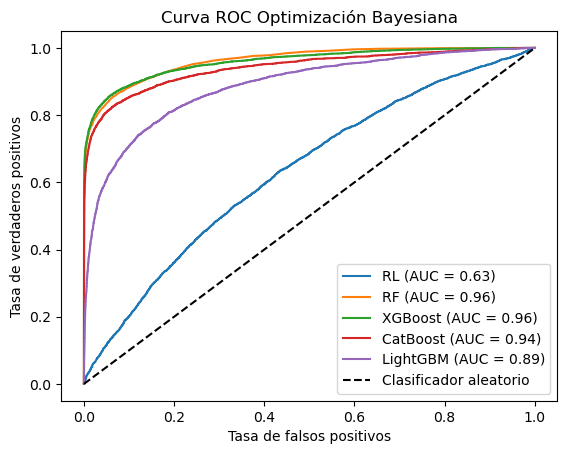

In [37]:
from sklearn.metrics import roc_curve, auc

# Definir los modelos de clasificación y sus nombres

#models = [grid, logreg, rf, xgb_grid_search, cb_grid_search, lbgm_grid_search] 
#model_names = ['SVM', 'RL', 'RF', "XGBoost", "CatBoost", "LightGBM"] 

models = [bayes_cv_logred, bayes_cv_rf, bayes_cv_xgb, bayes_cb, bayes_cv_lgbm, 
          #ensemble_model
         ] 
model_names = ['RL', 'RF', "XGBoost", "CatBoost", "LightGBM", 
               #"Ensemble"
              ] 

# Inicializar la figura
fig, ax = plt.subplots()

# Iterar sobre los modelos de clasificación y graficar sus curvas ROC
for i, model in enumerate(models):
    """if model ==  "SVM" or model == "RL":
        fpr, tpr, thresholds = roc_curve(y_test, model.decision_function(X_test))
        roc_auc = auc(fpr, tpr)
    else:
         # Calcular la curva ROC y el área bajo la curva (AUC)
        fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        roc_auc = auc(fpr, tpr)"""
    
    if hasattr(model, "predict_proba"):
        # Calcular la curva ROC y el área bajo la curva (AUC)
        fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        roc_auc = auc(fpr, tpr)
    elif hasattr(model, "decision_function"):
        # Calcular la curva ROC y el área bajo la curva (AUC)
        fpr, tpr, thresholds = roc_curve(y_test, model.decision_function(X_test))
        roc_auc = auc(fpr, tpr)
    else:
        roc_auc = roc_auc_score(y_test, model.predict(X_test), average='weighted')

    
   
    # Graficar la curva ROC
    ax.plot(fpr, tpr, label=f'{model_names[i]} (AUC = {roc_auc:.2f})')

# Agregar la línea de referencia diagonal
ax.plot([0, 1], [0, 1], 'k--', label='Clasificador aleatorio')

# Configurar las etiquetas y leyendas del gráfico
ax.set_xlabel('Tasa de falsos positivos')
ax.set_ylabel('Tasa de verdaderos positivos')
ax.set_title('Curva ROC Optimización Bayesiana')
ax.legend()

# Mostrar la figura
plt.show()


In [38]:
y_pred_logred = bayes_cv_logred.predict(X_test)
y_pred_bayes_rf = bayes_cv_rf.predict(X_test)
y_pred_bayes_xgb = bayes_cv_xgb.predict(X_test)
y_pred__bayes_cb = bayes_cb.predict(X_test)
y_pred__bayes_lgbm = bayes_cv_lgbm.predict(X_test)

In [67]:
# Crear el DataFrame
data_FN = {
    'Cluster': Cluster_test,
    'y_test': y_test,
    'RL': y_pred_logred,
    'RF': y_pred_bayes_rf,
    'XGBoost': y_pred_bayes_xgb,
    'CatBoost': y_pred__bayes_cb,
    'LighGBM': y_pred__bayes_lgbm,
    #'y_ensemble_model': y_ensemble_model
}

df_FN_bayes = pd.DataFrame(data_FN)
df_FN_bayes = df_FN_bayes.reset_index()

In [68]:
df_FN_bayes.head()

,index,Cluster,y_test,RL,RF,XGBoost,CatBoost,LighGBM
0,82905,2,0,0,0,0,0,0
1,110532,0,0,0,0,0,0,0
2,141846,1,0,0,0,0,0,0
3,70978,1,0,0,0,0,0,1
4,48905,0,0,0,0,0,0,0


In [144]:
df_FN_bayes.to_csv("df_FN_bayes.csv")

In [36]:
cb_FN_bayes.to_csv("cb_FN_bayes.csv")

In [49]:
prueba = df_FN_bayes[df_FN_bayes['Cluster'] == 0]

In [52]:
cm_rf_fn = pd.crosstab(
    prueba['y_test'].values,
    prueba['RF'].values,
    rownames=['Real'],
    colnames=['Predicción']
)

falsos_negativos = cm_rf_fn.iloc[1, 0]
suma_total = cm_rf_fn.values.sum()
print("Falsos Negativos:", falsos_negativos)
print("Suma total de la matriz de confusión:", suma_total)
print("Longuitud:", len(prueba['y_test']))

Falsos Negativos: 217
Suma total de la matriz de confusión: 11014
Longuitud: 11014


In [308]:
print("Matriz de Confusion de modelo de Ensamble")
print(tabulate(cm_ensemble_model_fn, headers='keys', tablefmt='fancy_grid'))
print("---")

Matriz de Confusion de modelo de Ensamble
╒════════╤══════╤═════╕
│   Real │    0 │   1 │
╞════════╪══════╪═════╡
│      0 │ 9992 │  94 │
├────────┼──────┼─────┤
│      1 │  219 │ 709 │
╘════════╧══════╧═════╛
---


In [53]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Obtener los valores reales y predichos
y_real = prueba['y_test'].values
y_pred = prueba['RF'].values

# Calcular la matriz de confusión
cm = confusion_matrix(y_real, y_pred)

# Crear un DataFrame a partir de la matriz de confusión
df_cm = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Imprimir el DataFrame de la matriz de confusión
df_cm

,Predicted 0,Predicted 1
Actual 0,10023,63
Actual 1,217,711


In [54]:
false_negatives = cm_rf_fn.loc[1, 0]  # Obtener el número de falsos negativos
actual_negatives = cm_rf_fn.loc[1, :].sum()  # Obtener el total de casos negativos reales

false_negative_rate = false_negatives / actual_negatives  # Calcular la tasa de falsos negativos

print('Falsos negativos:', false_negatives)
print('Total clasificados como negativo:', actual_negatives)
print('tasa de falsos negativos:', false_negative_rate)

Falsos negativos: 217
Total clasificados como negativo: 928
tasa de falsos negativos: 0.2338362068965517


In [58]:
#cluster 1
prueba1 = df_FN_bayes[df_FN_bayes['Cluster'] == 1]
cm_rf_fn1 = pd.crosstab(
    prueba1['y_test'].values,
    prueba1['RF'].values,
    rownames=['Real'],
    colnames=['Predicción']
)

false_negatives1 = cm_rf_fn1.loc[1, 0]  # Obtener el número de falsos negativos
actual_negatives1 = cm_rf_fn1.loc[1, :].sum()  # Obtener el total de casos negativos reales

false_negative_rate1 = false_negatives1 / actual_negatives1  # Calcular la tasa de falsos negativos

print('Falsos negativos:', false_negatives1)
print('Total clasificados como positivos:', actual_negatives1)
print('tasa de falsos negativos:', false_negative_rate1)

Falsos negativos: 222
Total clasificados como positivos: 706
tasa de falsos negativos: 0.31444759206798867


In [60]:
def false_negative_rate(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    fn = cm[1, 0]  # Falsos negativos: predicción negativa, pero verdadero positivo
    total_positives = cm[1, :].sum()  # Total de positivos
    return fn / total_positives

def total_positives(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    fn = cm[1, 0]  # Falsos negativos: predicción negativa, pero verdadero positivo
    total_positives = cm[1, :].sum()  # Total de positivos
    return total_positives

false_negative_rate(prueba1['y_test'].values, prueba1['RF'].values)
#total_positives(prueba1['y_test'].values, prueba1['RF'].values)

0.31444759206798867

In [62]:
false_negative_rate(y_test, y_pred_bayes_xgb)

0.2583524611068605

In [63]:
# Número de muestras bootstrap
n_bootstrap = 1000

# Inicializar una lista para almacenar los resultados de la tasa de falsos negativos
fns_bootstrap = []

# Realizar bootstrap
for _ in range(n_bootstrap):
    # Generar una muestra bootstrap para y_ensemble_model
    bootstrap_sample_ensemble = np.random.choice(y_pred_bayes_xgb, size=len(y_pred_bayes_xgb), replace=True)
    
    # Generar una muestra bootstrap para y_test
    bootstrap_sample_test = np.random.choice(y_test, size=len(y_test), replace=True)
    
    fn_rate = false_negative_rate(bootstrap_sample_test, bootstrap_sample_ensemble)
    fns_bootstrap.append(fn_rate)

# Calcular el intervalo de confianza del 95%
lower_bound = np.percentile(fns_bootstrap, 2.5)
upper_bound = np.percentile(fns_bootstrap, 97.5)

print("Intervalo de confianza (95%): [{:.4f}, {:.4f}]".format(lower_bound, upper_bound))


Intervalo de confianza (95%): [0.9177, 0.9339]


In [170]:
# Resetear el índice de y_test
y_test = y_test.reset_index(drop=True)
y_test_cluster = y_test_cluster.reset_index(drop=True)

In [193]:
# Número de muestras bootstrap
n_bootstrap = 1000

# Inicializar una lista para almacenar los resultados de la tasa de falsos negativos
fns_bootstrap = []

# Realizar bootstrap
for _ in range(n_bootstrap):
    # Generar una muestra de índices bootstrap
    bootstrap_indices = np.random.choice(range(len(y_pred_bayes_xgb)), size=len(y_pred_bayes_xgb), replace=True)
    
    # Obtener los elementos correspondientes en y_pred_bayes_xgb y y_test_reset usando los índices bootstrap
    bootstrap_sample_ensemble = y_pred_bayes_xgb[bootstrap_indices]
    bootstrap_sample_test = y_test[bootstrap_indices]
    
    # Calcular la tasa de falsos negativos para la muestra bootstrap actual
    fn_rate = false_negative_rate(bootstrap_sample_test, bootstrap_sample_ensemble)
    fns_bootstrap.append(fn_rate)

# Calcular el intervalo de confianza del 95%
lower_bound = np.percentile(fns_bootstrap, 2.5)
upper_bound = np.percentile(fns_bootstrap, 97.5)

print('INTERVALO DE CONFIANZA TFN XGBoost')
print('Tasa de Falsos Negativos para XGBoost: {:.4f}'.format(false_negative_rate(y_test, y_pred_bayes_xgb))) 
print("Intervalo de confianza (95%): [{:.4f}, {:.4f}]".format(lower_bound, upper_bound))


INTERVALO DE CONFIANZA TFN XGBoost
Tasa de Falsos Negativos para XGBoost: 0.2584
Intervalo de confianza (95%): [0.2452, 0.2715]


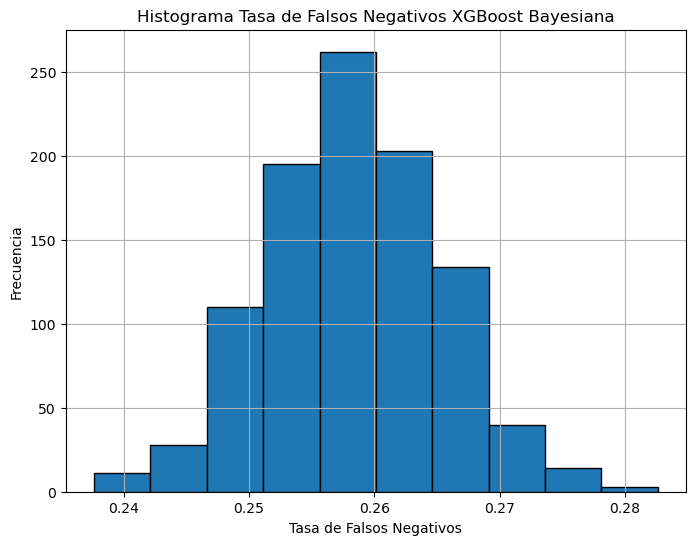

In [195]:
# Graficar el histograma
plt.figure(figsize=(8, 6))
plt.hist(fns_bootstrap, bins=10, edgecolor='black')
plt.xlabel('Tasa de Falsos Negativos')
plt.ylabel('Frecuencia')
plt.title('Histograma Tasa de Falsos Negativos XGBoost Bayesiana')
plt.grid(True)
plt.show()

In [94]:
# Número de muestras bootstrap
n_bootstrap = 1000

# Inicializar una lista para almacenar los resultados de la tasa de falsos negativos
fns_bootstrap = []

# Realizar bootstrap
for _ in range(n_bootstrap):
    # Generar una muestra de índices bootstrap
    bootstrap_indices = np.random.choice(range(len(y_pred_logred)), size=len(y_pred_logred), replace=True)
    
    # Obtener los elementos correspondientes en y_pred_bayes_xgb y y_test_reset usando los índices bootstrap
    bootstrap_sample_ensemble = y_pred_logred[bootstrap_indices]
    bootstrap_sample_test = y_test[bootstrap_indices]
    
    # Calcular la tasa de falsos negativos para la muestra bootstrap actual
    fn_rate = false_negative_rate(bootstrap_sample_test, bootstrap_sample_ensemble)
    fns_bootstrap.append(fn_rate)

# Calcular el intervalo de confianza del 95%
lower_bound = np.percentile(fns_bootstrap, 2.5)
upper_bound = np.percentile(fns_bootstrap, 97.5)

print('INTERVALO DE CONFIANZA TFN REGRESIÓN LOGÍSTICA')
print('Tasa de Falsos Negativos para Regresión Logística: {:.4f}'.format(false_negative_rate(y_test, y_pred_logred))) 
print("Intervalo de confianza (95%): [{:.4f}, {:.4f}]".format(lower_bound, upper_bound))


INTERVALO DE CONFIANZA TFN REGRESIÓN LOGÍSTICA
Tasa de Falsos Negativos para Regresión Logística: 0.4116
Intervalo de confianza (95%): [0.3957, 0.4267]


In [205]:
# Número de muestras bootstrap
n_bootstrap = 1000

# Inicializar una lista para almacenar los resultados de la tasa de falsos negativos
fns_bootstrap = []

# Realizar bootstrap
for _ in range(n_bootstrap):
    # Generar una muestra de índices bootstrap
    bootstrap_indices = np.random.choice(range(len(y_pred_bayes_rf)), size=len(y_pred_bayes_rf), replace=True)
    
    # Obtener los elementos correspondientes en y_pred_bayes_xgb y y_test_reset usando los índices bootstrap
    bootstrap_sample_ensemble = y_pred_bayes_rf[bootstrap_indices]
    bootstrap_sample_test = y_test[bootstrap_indices]
    
    # Calcular la tasa de falsos negativos para la muestra bootstrap actual
    fn_rate = false_negative_rate(bootstrap_sample_test, bootstrap_sample_ensemble)
    fns_bootstrap.append(fn_rate)

# Calcular el intervalo de confianza del 95%
lower_bound = np.percentile(fns_bootstrap, 2.5)
upper_bound = np.percentile(fns_bootstrap, 97.5)

print('INTERVALO DE CONFIANZA TFN RANDOM FOREST')
print('Tasa de Falsos Negativos para Random Forest: {:.4f}'.format(false_negative_rate(y_test, y_pred_bayes_rf))) 
print("Intervalo de confianza (95%): [{:.4f}, {:.4f}]".format(lower_bound, upper_bound))


INTERVALO DE CONFIANZA TFN RANDOM FOREST
Tasa de Falsos Negativos para Random Forest: 0.2788
Intervalo de confianza (95%): [0.2634, 0.2927]


In [96]:
# Número de muestras bootstrap
n_bootstrap = 1000

# Inicializar una lista para almacenar los resultados de la tasa de falsos negativos
fns_bootstrap = []

# Realizar bootstrap
for _ in range(n_bootstrap):
    # Generar una muestra de índices bootstrap
    bootstrap_indices = np.random.choice(range(len(y_pred__bayes_cb)), size=len(y_pred__bayes_cb), replace=True)
    
    # Obtener los elementos correspondientes en y_pred_bayes_xgb y y_test_reset usando los índices bootstrap
    bootstrap_sample_ensemble = y_pred__bayes_cb[bootstrap_indices]
    bootstrap_sample_test = y_test[bootstrap_indices]
    
    # Calcular la tasa de falsos negativos para la muestra bootstrap actual
    fn_rate = false_negative_rate(bootstrap_sample_test, bootstrap_sample_ensemble)
    fns_bootstrap.append(fn_rate)

# Calcular el intervalo de confianza del 95%
lower_bound = np.percentile(fns_bootstrap, 2.5)
upper_bound = np.percentile(fns_bootstrap, 97.5)

print('INTERVALO DE CONFIANZA TFN CatBoost')
print('Tasa de Falsos Negativos para CatBoost: {:.4f}'.format(false_negative_rate(y_test, y_pred__bayes_cb))) 
print("Intervalo de confianza (95%): [{:.4f}, {:.4f}]".format(lower_bound, upper_bound))


INTERVALO DE CONFIANZA TFN CatBoost
Tasa de Falsos Negativos para CatBoost: 0.2191
Intervalo de confianza (95%): [0.2053, 0.2331]


In [80]:
# Número de muestras bootstrap
n_bootstrap = 1000

# Inicializar una lista para almacenar los resultados de la tasa de falsos negativos
fns_bootstrap = []

# Realizar bootstrap
for _ in range(n_bootstrap):
    # Generar una muestra de índices bootstrap
    bootstrap_indices = np.random.choice(range(len(y_pred__bayes_lgbm)), size=len(y_pred__bayes_lgbm), replace=True)
    
    # Obtener los elementos correspondientes en y_pred_bayes_xgb y y_test_reset usando los índices bootstrap
    bootstrap_sample_ensemble = y_pred__bayes_lgbm[bootstrap_indices]
    bootstrap_sample_test = y_test[bootstrap_indices]
    
    # Calcular la tasa de falsos negativos para la muestra bootstrap actual
    fn_rate = false_negative_rate(bootstrap_sample_test, bootstrap_sample_ensemble)
    fns_bootstrap.append(fn_rate)

# Calcular el intervalo de confianza del 95%
lower_bound = np.percentile(fns_bootstrap, 2.5)
upper_bound = np.percentile(fns_bootstrap, 97.5)

print('INTERVALO DE CONFIANZA TFN LightGBM')
print('Tasa de Falsos Negativos para LighGBM: {:.4f}'.format(false_negative_rate(y_test, y_pred__bayes_lgbm))) 
print("Intervalo de confianza (95%): [{:.4f}, {:.4f}]".format(lower_bound, upper_bound))


INTERVALO DE CONFIANZA TFN LightGBM
Tasa de Falsos Negativos para LighGBM: 0.2599
Intervalo de confianza (95%): [0.2467, 0.2737]


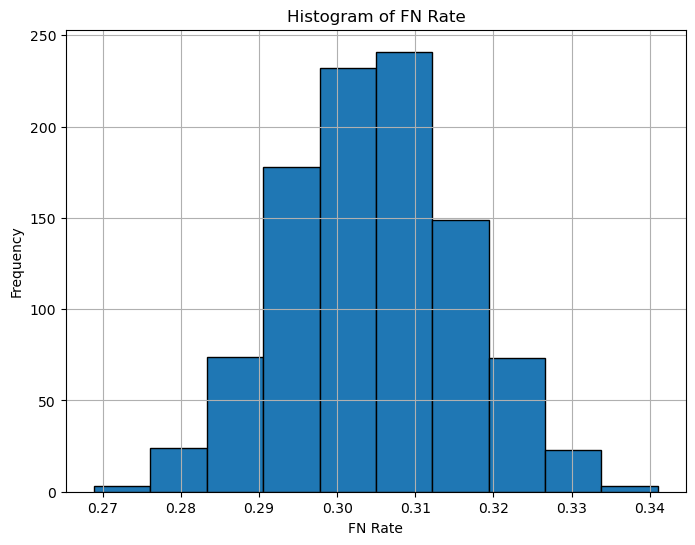

In [157]:
# Graficar el histograma
plt.figure(figsize=(8, 6))
plt.hist(fns_bootstrap, bins=10, edgecolor='black')
plt.xlabel('FN Rate')
plt.ylabel('Frequency')
plt.title('Histogram of FN Rate')
plt.grid(True)
plt.show()

In [86]:
import statsmodels.stats.proportion as prop
import statsmodels.api as sm

# Datos de ejemplo
n2 = total_positives(y_test, y_pred_bayes_xgb)  # Tamaño de la muestra del cluster 2
p2 = false_negative_rate(y_test, y_pred_bayes_xgb)  # Proporción del del cluster 2
n1 = total_positives(y_test, y_pred_bayes_rf)  # Tamaño de la muestra del del cluster 1
p1 = false_negative_rate(y_test, y_pred_bayes_rf)  # Proporción del del cluster 1

# Calcular los éxitos en cada grupo
successes1 = int(n1 * p1)
successes2 = int(n2 * p2)


# Realizar la prueba de hipótesis
z, p_value = sm.stats.proportions_ztest([successes1, 
                                         successes2], 
                                        [n1, 
                                         n2]
                                       )

# Calcular el intervalo de confianza
conf_int1 = prop.proportion_confint(successes1, 
                                    n1)

conf_int2 = prop.proportion_confint(successes2, 
                                    n2)

conf_int = (conf_int1[0] - conf_int2[1], conf_int1[1] - conf_int2[0])

# Imprimir los resultados
print("Prueba de hipótesis de diferencia de proporciones para TFN Random Forest vs XGBoost")
print("Diferencia de proporciones:", p1 - p2)
print("Valor p:", p_value)
print("Intervalo de confianza:", conf_int)

Prueba de hipótesis de diferencia de proporciones para TFN Random Forest vs XGBoost
Diferencia de proporciones: 0.020402958428972218
Valor p: 0.041519214343806184
Intervalo de confianza: (-0.0073328030774938435, 0.04813871993543828)


In [87]:
import statsmodels.stats.proportion as prop
import statsmodels.api as sm

# Datos de ejemplo
n2 = total_positives(y_test, y_pred__bayes_cb)  # Tamaño de la muestra del cluster 2
p2 = false_negative_rate(y_test, y_pred__bayes_cb)  # Proporción del del cluster 2
n1 = total_positives(y_test, y_pred_bayes_rf)  # Tamaño de la muestra del del cluster 1
p1 = false_negative_rate(y_test, y_pred_bayes_rf)  # Proporción del del cluster 1

# Calcular los éxitos en cada grupo
successes1 = int(n1 * p1)
successes2 = int(n2 * p2)


# Realizar la prueba de hipótesis
z, p_value = sm.stats.proportions_ztest([successes1, 
                                         successes2], 
                                        [n1, 
                                         n2]
                                       )

# Calcular el intervalo de confianza
conf_int1 = prop.proportion_confint(successes1, 
                                    n1)

conf_int2 = prop.proportion_confint(successes2, 
                                    n2)

conf_int = (conf_int1[0] - conf_int2[1], conf_int1[1] - conf_int2[0])

# Imprimir los resultados
print("Prueba de hipótesis de diferencia de proporciones para TFN Random Forest vs CatBoost")
print("Diferencia de proporciones:", p1 - p2)
print("Valor p:", p_value)
print("Intervalo de confianza:", conf_int)

Prueba de hipótesis de diferencia de proporciones para TFN Random Forest vs CatBoost
Diferencia de proporciones: 0.05967865340474371
Valor p: 9.883919038288167e-10
Intervalo de confianza: (0.032697481414366514, 0.0866598253951209)


In [89]:
import statsmodels.stats.proportion as prop
import statsmodels.api as sm

# Datos de ejemplo
n2 = total_positives(y_test, y_pred__bayes_lgbm)  # Tamaño de la muestra del cluster 2
p2 = false_negative_rate(y_test, y_pred__bayes_lgbm)  # Proporción del del cluster 2
n1 = total_positives(y_test, y_pred_bayes_rf)  # Tamaño de la muestra del del cluster 1
p1 = false_negative_rate(y_test, y_pred_bayes_rf)  # Proporción del del cluster 1

# Calcular los éxitos en cada grupo
successes1 = int(n1 * p1)
successes2 = int(n2 * p2)


# Realizar la prueba de hipótesis
z, p_value = sm.stats.proportions_ztest([successes1, 
                                         successes2], 
                                        [n1, 
                                         n2]
                                       )

# Calcular el intervalo de confianza
conf_int1 = prop.proportion_confint(successes1, 
                                    n1)

conf_int2 = prop.proportion_confint(successes2, 
                                    n2)

conf_int = (conf_int1[0] - conf_int2[1], conf_int1[1] - conf_int2[0])

# Imprimir los resultados
print("Prueba de hipótesis de diferencia de proporciones para TFN Random Forest vs LightGBM")
print("Diferencia de proporciones:", p1 - p2)
print("Valor p:", p_value)
print("Intervalo de confianza:", conf_int)

Prueba de hipótesis de diferencia de proporciones para TFN Random Forest vs LightGBM
Diferencia de proporciones: 0.01887273654679933
Valor p: 0.056200059050629705
Intervalo de confianza: (-0.008629946588821213, 0.046885493643144066)


In [90]:
import statsmodels.stats.proportion as prop
import statsmodels.api as sm

# Datos de ejemplo
n2 = total_positives(y_test, y_pred__bayes_lgbm)  # Tamaño de la muestra del cluster 2
p2 = false_negative_rate(y_test, y_pred__bayes_lgbm)  # Proporción del del cluster 2
n1 = total_positives(y_test, y_pred_bayes_xgb)  # Tamaño de la muestra del del cluster 1
p1 = false_negative_rate(y_test, y_pred_bayes_xgb)  # Proporción del del cluster 1

# Calcular los éxitos en cada grupo
successes1 = int(n1 * p1)
successes2 = int(n2 * p2)


# Realizar la prueba de hipótesis
z, p_value = sm.stats.proportions_ztest([successes1, 
                                         successes2], 
                                        [n1, 
                                         n2]
                                       )

# Calcular el intervalo de confianza
conf_int1 = prop.proportion_confint(successes1, 
                                    n1)

conf_int2 = prop.proportion_confint(successes2, 
                                    n2)

conf_int = (conf_int1[0] - conf_int2[1], conf_int1[1] - conf_int2[0])

# Imprimir los resultados
print("Prueba de hipótesis de diferencia de proporciones para TFN XGBoost vs LightGBM")
print("Diferencia de proporciones:", p1 - p2)
print("Valor p:", p_value)
print("Intervalo de confianza:", conf_int)

Prueba de hipótesis de diferencia de proporciones para TFN XGBoost vs LightGBM
Diferencia de proporciones: -0.0015302218821728886
Valor p: 0.897448493760275
Intervalo de confianza: (-0.028699300304996456, 0.026148930501374873)


In [91]:
import statsmodels.stats.proportion as prop
import statsmodels.api as sm

# Datos de ejemplo
n2 = total_positives(y_test, y_pred__bayes_cb)  # Tamaño de la muestra del cluster 2
p2 = false_negative_rate(y_test, y_pred__bayes_cb)  # Proporción del del cluster 2
n1 = total_positives(y_test, y_pred_bayes_xgb)  # Tamaño de la muestra del del cluster 1
p1 = false_negative_rate(y_test, y_pred_bayes_xgb)  # Proporción del del cluster 1

# Calcular los éxitos en cada grupo
successes1 = int(n1 * p1)
successes2 = int(n2 * p2)


# Realizar la prueba de hipótesis
z, p_value = sm.stats.proportions_ztest([successes1, 
                                         successes2], 
                                        [n1, 
                                         n2]
                                       )

# Calcular el intervalo de confianza
conf_int1 = prop.proportion_confint(successes1, 
                                    n1)

conf_int2 = prop.proportion_confint(successes2, 
                                    n2)

conf_int = (conf_int1[0] - conf_int2[1], conf_int1[1] - conf_int2[0])

# Imprimir los resultados
print("Prueba de hipótesis de diferencia de proporciones para TFN XGBoost vs CatBoost")
print("Diferencia de proporciones:", p1 - p2)
print("Valor p:", p_value)
print("Intervalo de confianza:", conf_int)

Prueba de hipótesis de diferencia de proporciones para TFN XGBoost vs CatBoost
Diferencia de proporciones: 0.03927569497577149
Valor p: 4.515617310372382e-05
Intervalo de confianza: (0.012628127698191272, 0.06592326225335171)


In [92]:
import statsmodels.stats.proportion as prop
import statsmodels.api as sm

# Datos de ejemplo
n2 = total_positives(y_test, y_pred__bayes_cb)  # Tamaño de la muestra del cluster 2
p2 = false_negative_rate(y_test, y_pred__bayes_cb)  # Proporción del del cluster 2
n1 = total_positives(y_test, y_pred__bayes_lgbm)  # Tamaño de la muestra del del cluster 1
p1 = false_negative_rate(y_test, y_pred__bayes_lgbm)  # Proporción del del cluster 1

# Calcular los éxitos en cada grupo
successes1 = int(n1 * p1)
successes2 = int(n2 * p2)


# Realizar la prueba de hipótesis
z, p_value = sm.stats.proportions_ztest([successes1, 
                                         successes2], 
                                        [n1, 
                                         n2]
                                       )

# Calcular el intervalo de confianza
conf_int1 = prop.proportion_confint(successes1, 
                                    n1)

conf_int2 = prop.proportion_confint(successes2, 
                                    n2)

conf_int = (conf_int1[0] - conf_int2[1], conf_int1[1] - conf_int2[0])

# Imprimir los resultados
print("Prueba de hipótesis de diferencia de proporciones para TFN LightGBM vs CatBoost")
print("Diferencia de proporciones:", p1 - p2)
print("Valor p:", p_value)
print("Intervalo de confianza:", conf_int)

Prueba de hipótesis de diferencia de proporciones para TFN LightGBM vs CatBoost
Diferencia de proporciones: 0.04080591685794438
Valor p: 2.5766901144948803e-05
Intervalo de confianza: (0.013881353990485484, 0.06722040576467908)


In [97]:
import statsmodels.stats.proportion as prop
import statsmodels.api as sm

# Datos de ejemplo
n2 = total_positives(y_test, y_pred__bayes_cb)  # Tamaño de la muestra del cluster 2
p2 = false_negative_rate(y_test, y_pred__bayes_cb)  # Proporción del del cluster 2
n1 = total_positives(y_test, y_pred__bayes_cb)  # Tamaño de la muestra del del cluster 1
p1 = false_negative_rate(y_test, y_pred__bayes_cb)  # Proporción del del cluster 1

# Calcular los éxitos en cada grupo
successes1 = int(n1 * p1)
successes2 = int(n2 * p2)


# Realizar la prueba de hipótesis
z, p_value = sm.stats.proportions_ztest([successes1, 
                                         successes2], 
                                        [n1, 
                                         n2]
                                       )

# Calcular el intervalo de confianza
conf_int1 = prop.proportion_confint(successes1, 
                                    n1)

conf_int2 = prop.proportion_confint(successes2, 
                                    n2)

conf_int = (conf_int1[0] - conf_int2[1], conf_int1[1] - conf_int2[0])

# Imprimir los resultados
print("Prueba de hipótesis de diferencia de proporciones para TFN CatBoost vs CatBoost")
print("Diferencia de proporciones:", p1 - p2)
print("Valor p:", p_value)
print("Intervalo de confianza:", conf_int)

Prueba de hipótesis de diferencia de proporciones para TFN CatBoost vs CatBoost
Diferencia de proporciones: 0.0
Valor p: 1.0
Intervalo de confianza: (-0.025892977761491354, 0.025892977761491354)


In [98]:
df_FN_bayes.head()

,index,Cluster,y_test,RL,RF,XGBoost,CatBoost,LighGBM
0,82905,2,0,0,0,0,0,0
1,110532,0,0,0,0,0,0,0
2,141846,1,0,0,0,0,0,0
3,70978,1,0,0,0,0,0,1
4,48905,0,0,0,0,0,0,0


In [207]:
# Número de muestras bootstrap
n_bootstrap = 1000

# Lista para almacenar los resultados de los intervalos de confianza
intervalos_confianza = []

# Realizar el ciclo para cada cluster
for cluster in df_FN_bayes['Cluster'].unique():
    # Obtener los datos correspondientes al cluster actual
    y_test_cluster = df_FN_bayes[df_FN_bayes['Cluster'] == cluster]['y_test']
    y_pred_rf_cluster = df_FN_bayes[df_FN_bayes['Cluster'] == cluster]['RF']
    
    # Lista para almacenar los resultados de la tasa de falsos negativos bootstrap
    fns_bootstrap = []
    
    # Realizar bootstrap
    for _ in range(n_bootstrap):
        # Generar una muestra de índices bootstrap
        bootstrap_indices = np.random.choice(range(len(y_pred_bayes_rf)), size=len(y_pred_bayes_rf), replace=True)

        # Obtener los elementos correspondientes en y_pred_bayes_xgb y y_test_reset usando los índices bootstrap
        bootstrap_sample_ensemble = y_pred_bayes_rf[bootstrap_indices]
        bootstrap_sample_test = y_test[bootstrap_indices]
    
        # Calcular la tasa de falsos negativos para la muestra bootstrap actual
        fn_rate = false_negative_rate(bootstrap_sample_test, bootstrap_sample_ensemble)
        fns_bootstrap.append(fn_rate)

    
    # Calcular el intervalo de confianza del 95% para el cluster actual
    lower_bound = np.percentile(fns_bootstrap, 2.5)
    upper_bound = np.percentile(fns_bootstrap, 97.5)
    
    # Agregar los resultados a la lista de intervalos de confianza
    intervalos_confianza.append((lower_bound, upper_bound))
    
# Crear un DataFrame con los resultados
resultados_df = pd.DataFrame({
    'Cluster': df_FN_bayes['Cluster'].unique(),
    'TFN_RF': [false_negative_rate(df_FN_bayes[df_FN_bayes['Cluster'] == cluster]['y_test'], 
                                   df_FN_bayes[df_FN_bayes['Cluster'] == cluster]['RF']) for cluster in df_FN_bayes['Cluster'].unique()],
    'Intervalo Inferior': [intervalo[0] for intervalo in intervalos_confianza],
    'Intervalo Superior': [intervalo[1] for intervalo in intervalos_confianza]
})

# Imprimir el DataFrame de resultados
resultados_df

,Cluster,TFN_RF,Intervalo Inferior,Intervalo Superior
0,2,0.215933,0.266236,0.292958
1,0,0.233836,0.265496,0.292852
2,1,0.314448,0.265271,0.292870
3,3,0.304420,0.265465,0.292580


In [208]:
import pandas as pd
import statsmodels.stats.proportion as prop

# Crear un DataFrame vacío para almacenar los resultados
results_df = pd.DataFrame(columns=['Cluster', 'Diferencia de proporciones', 'Valor p', 'Intervalo de confianza'])

# Calcular los valores de referencia para el cluster 0
n0 = total_positives(df_FN_bayes[df_FN_bayes['Cluster'] == 0]['y_test'], df_FN_bayes[df_FN_bayes['Cluster'] == 0]['RF'])
p0 = false_negative_rate(df_FN_bayes[df_FN_bayes['Cluster'] == 0]['y_test'], df_FN_bayes[df_FN_bayes['Cluster'] == 0]['RF'])

# Iterar sobre cada clúster
for cluster in df_FN_bayes['Cluster'].unique():
    # Filtrar los datos por clúster
    cluster_data = df_FN_bayes[df_FN_bayes['Cluster'] == cluster]
    
    # Obtener el tamaño de la muestra y la proporción del clúster actual
    n = total_positives(cluster_data['y_test'], cluster_data['RF'])
    p = false_negative_rate(cluster_data['y_test'], cluster_data['RF'])
    
    # Calcular la diferencia de proporciones
    diff_prop = p - p0
    
    # Realizar la prueba de hipótesis utilizando prop.proportions_ztest()
    z_score, p_value = prop.proportions_ztest([n * p, n0 * p0], [n, n0])
    
    # Calcular el intervalo de confianza
    conf_int = prop.proportion_confint(n * p, n)
    
    # Agregar los resultados al DataFrame
    results_df = results_df.append({'Cluster': cluster,
                                    'Diferencia de proporciones': diff_prop,
                                    'Valor p': p_value,
                                    'Intervalo de confianza': conf_int}, ignore_index=True)

# Imprimir el DataFrame de resultados
cluster_0 = results_df

cluster_0


,Cluster,Diferencia de proporciones,Valor p,Intervalo de confianza
0,2,-0.017903,0.448613,"(0.17900753722851753, 0.25285829086372563)"
1,0,0.000000,1.000000,"(0.20660350111776818, 0.2610689126753353)"
2,1,0.080611,0.000271,"(0.2801991983495868, 0.34869598578639055)"
3,3,0.070584,0.000100,"(0.2832207177631216, 0.3256190612424033)"


In [209]:
import pandas as pd
import statsmodels.stats.proportion as prop

# Crear un DataFrame vacío para almacenar los resultados
results_df = pd.DataFrame(columns=['Cluster', 'Diferencia de proporciones', 'Valor p', 'Intervalo de confianza'])

# Calcular los valores de referencia para el cluster 1
n0 = total_positives(df_FN_bayes[df_FN_bayes['Cluster'] == 1]['y_test'], df_FN_bayes[df_FN_bayes['Cluster'] == 1]['RF'])
p0 = false_negative_rate(df_FN_bayes[df_FN_bayes['Cluster'] == 1]['y_test'], df_FN_bayes[df_FN_bayes['Cluster'] == 1]['RF'])

# Iterar sobre cada clúster
for cluster in df_FN_bayes['Cluster'].unique():
    # Filtrar los datos por clúster
    cluster_data = df_FN_bayes[df_FN_bayes['Cluster'] == cluster]
    
    # Obtener el tamaño de la muestra y la proporción del clúster actual
    n = total_positives(cluster_data['y_test'], cluster_data['RF'])
    p = false_negative_rate(cluster_data['y_test'], cluster_data['RF'])
    
    # Calcular la diferencia de proporciones
    diff_prop = p - p0
    
    # Realizar la prueba de hipótesis utilizando prop.proportions_ztest()
    z_score, p_value = prop.proportions_ztest([n * p, n0 * p0], [n, n0])
    
    # Calcular el intervalo de confianza
    conf_int = prop.proportion_confint(n * p, n)
    
    # Agregar los resultados al DataFrame
    results_df = results_df.append({'Cluster': cluster,
                                    'Diferencia de proporciones': diff_prop,
                                    'Valor p': p_value,
                                    'Intervalo de confianza': conf_int}, ignore_index=True)

# Imprimir el DataFrame de resultados
cluster_1 = results_df

cluster_1


,Cluster,Diferencia de proporciones,Valor p,Intervalo de confianza
0,2,-0.098515,0.000196,"(0.17900753722851753, 0.25285829086372563)"
1,0,-0.080611,0.000271,"(0.20660350111776818, 0.2610689126753353)"
2,1,0.000000,1.000000,"(0.2801991983495868, 0.34869598578639055)"
3,3,-0.010028,0.624243,"(0.2832207177631216, 0.3256190612424033)"


In [210]:
import pandas as pd
import statsmodels.stats.proportion as prop

# Crear un DataFrame vacío para almacenar los resultados
results_df = pd.DataFrame(columns=['Cluster', 'Diferencia de proporciones', 'Valor p', 'Intervalo de confianza'])

# Calcular los valores de referencia para el cluster 2
n0 = total_positives(df_FN_bayes[df_FN_bayes['Cluster'] == 2]['y_test'], df_FN_bayes[df_FN_bayes['Cluster'] == 2]['RF'])
p0 = false_negative_rate(df_FN_bayes[df_FN_bayes['Cluster'] == 2]['y_test'], df_FN_bayes[df_FN_bayes['Cluster'] == 2]['RF'])

# Iterar sobre cada clúster
for cluster in df_FN_bayes['Cluster'].unique():
    # Filtrar los datos por clúster
    cluster_data = df_FN_bayes[df_FN_bayes['Cluster'] == cluster]
    
    # Obtener el tamaño de la muestra y la proporción del clúster actual
    n = total_positives(cluster_data['y_test'], cluster_data['RF'])
    p = false_negative_rate(cluster_data['y_test'], cluster_data['RF'])
    
    # Calcular la diferencia de proporciones
    diff_prop = p - p0
    
    # Realizar la prueba de hipótesis utilizando prop.proportions_ztest()
    z_score, p_value = prop.proportions_ztest([n * p, n0 * p0], [n, n0])
    
    # Calcular el intervalo de confianza
    conf_int = prop.proportion_confint(n * p, n)
    
    # Agregar los resultados al DataFrame
    results_df = results_df.append({'Cluster': cluster,
                                    'Diferencia de proporciones': diff_prop,
                                    'Valor p': p_value,
                                    'Intervalo de confianza': conf_int}, ignore_index=True)

# Imprimir el DataFrame de resultados
cluster_2 = results_df

cluster_2


,Cluster,Diferencia de proporciones,Valor p,Intervalo de confianza
0,2,0.000000,1.000000,"(0.17900753722851753, 0.25285829086372563)"
1,0,0.017903,0.448613,"(0.20660350111776818, 0.2610689126753353)"
2,1,0.098515,0.000196,"(0.2801991983495868, 0.34869598578639055)"
3,3,0.088487,0.000142,"(0.2832207177631216, 0.3256190612424033)"


In [216]:
import pandas as pd
import statsmodels.stats.proportion as prop

# Crear un DataFrame vacío para almacenar los resultados
results_df = pd.DataFrame(columns=['Cluster', 'Diferencia de proporciones', 'Valor p', 'Intervalo de confianza'])

# Calcular los valores de referencia para el cluster 3
n0 = total_positives(df_FN_bayes[df_FN_bayes['Cluster'] == 3]['y_test'], df_FN_bayes[df_FN_bayes['Cluster'] == 3]['RF'])
p0 = false_negative_rate(df_FN_bayes[df_FN_bayes['Cluster'] == 3]['y_test'], df_FN_bayes[df_FN_bayes['Cluster'] == 3]['RF'])

# Iterar sobre cada clúster
for cluster in df_FN_bayes['Cluster'].unique():
    # Filtrar los datos por clúster
    cluster_data = df_FN_bayes[df_FN_bayes['Cluster'] == cluster]
    
    # Obtener el tamaño de la muestra y la proporción del clúster actual
    n = total_positives(cluster_data['y_test'], cluster_data['RF'])
    p = false_negative_rate(cluster_data['y_test'], cluster_data['RF'])
    
    # Calcular la diferencia de proporciones
    diff_prop = p - p0
    
    # Realizar la prueba de hipótesis utilizando prop.proportions_ztest()
    z_score, p_value = prop.proportions_ztest([n * p, n0 * p0], [n, n0])
    
    # Calcular el intervalo de confianza
    conf_int = prop.proportion_confint(n * p, n)
    
    # Agregar los resultados al DataFrame
    results_df = results_df.append({'Cluster': cluster,
                                    'Diferencia de proporciones': diff_prop,
                                    'Valor p': p_value,
                                    'Intervalo de confianza': conf_int}, ignore_index=True)

# Imprimir el DataFrame de resultados
cluster_3 = results_df

cluster_3


,Cluster,Diferencia de proporciones,Valor p,Intervalo de confianza
0,2,-0.088487,0.000142,"(0.17900753722851753, 0.25285829086372563)"
1,0,-0.070584,0.000100,"(0.20660350111776818, 0.2610689126753353)"
2,1,0.010028,0.624243,"(0.2801991983495868, 0.34869598578639055)"
3,3,0.000000,1.000000,"(0.2832207177631216, 0.3256190612424033)"


In [217]:
d = pd.merge(cluster_1[['Cluster','Valor p']], cluster_2[['Cluster','Valor p']], on="Cluster", how="inner")
d = d.rename(columns={'Valor p_x': 'Valor p Cluster 1', 'Valor p_y': 'Valor p Cluster 2'})
d

,Cluster,Valor p Cluster 1,Valor p Cluster 2
0,2,0.000196,1.000000
1,0,0.000271,0.448613
2,1,1.000000,0.000196
3,3,0.624243,0.000142


In [218]:
p = pd.merge(cluster_0[['Cluster','Valor p']], cluster_3[['Cluster','Valor p']], on="Cluster", how="inner")
p = p.rename(columns={'Valor p_x': 'Valor p Cluster 0', 'Valor p_y': 'Valor p Cluster 3'})
p

,Cluster,Valor p Cluster 0,Valor p Cluster 3
0,2,0.448613,0.000142
1,0,1.000000,0.000100
2,1,0.000271,0.624243
3,3,0.000100,1.000000


In [219]:
e = pd.merge(d, p, on = "Cluster", how = "inner")
e = e.sort_values(by='Cluster')
e

,Cluster,Valor p Cluster 1,Valor p Cluster 2,Valor p Cluster 0,Valor p Cluster 3
1,0,0.000271,0.448613,1.000000,0.000100
2,1,1.000000,0.000196,0.000271,0.624243
0,2,0.000196,1.000000,0.448613,0.000142
3,3,0.624243,0.000142,0.000100,1.000000


In [117]:
import pandas as pd

data = {
    '': ['Random Forest', 'XGBoost', 'CatBoost', 'LightGBM'],
    'Random Forest': [1, 0.0415, 9.8839e-10, 0.0562],
    'XGBoost': [0.0415, 1, 4.5156e-5, 0.8974],
    'CatBoost': [9.8839e-10, 4.5156e-5, 1, 2.5766e-5],
    'LightGBM': [0.0562, 0.8974, 2.5766e-5, 1]
}

df = pd.DataFrame(data)
df.set_index('', inplace=True)

df


,Random Forest,XGBoost,CatBoost,LightGBM
,,,,
Random Forest,1.000000e+00,0.041500,9.883900e-10,0.056200
XGBoost,4.150000e-02,1.000000,4.515600e-05,0.897400
CatBoost,9.883900e-10,0.000045,1.000000e+00,0.000026
LightGBM,5.620000e-02,0.897400,2.576600e-05,1.000000


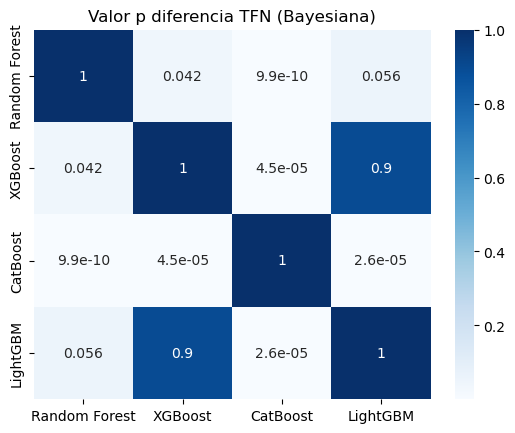

In [122]:
# Generar el heatmap
sns.heatmap(df, annot=True, cmap='Blues')

# Agregar el título y el subtítulo
plt.title('Valor p diferencia TFN (Bayesiana)')
#plt.suptitle('Optimización Grid Search')

# Mostrar el heatmap
plt.show()

In [220]:
e

,Cluster,Valor p Cluster 1,Valor p Cluster 2,Valor p Cluster 0,Valor p Cluster 3
1,0,0.000271,0.448613,1.000000,0.000100
2,1,1.000000,0.000196,0.000271,0.624243
0,2,0.000196,1.000000,0.448613,0.000142
3,3,0.624243,0.000142,0.000100,1.000000


In [221]:
data = {
    '': ['Clúster 1', 'Clúster 2', 'Clúster 3', 'Clúster 4'],
    'Clúster 1': [1,          0.000271,      0.448613,   0.000100],
    'Clúster 2': [0.000271,   1,             0.000196,      0.624243],
    'Clúster 3': [0.448613,   0.000196,      1,             0.000142],
    'Clúster 4': [0.000100,   0.624243,      0.000142,   1]
}

df = pd.DataFrame(data)
df.set_index('', inplace=True)

df

,Clúster 1,Clúster 2,Clúster 3,Clúster 4
,,,,
Clúster 1,1.000000,0.000271,0.448613,0.000100
Clúster 2,0.000271,1.000000,0.000196,0.624243
Clúster 3,0.448613,0.000196,1.000000,0.000142
Clúster 4,0.000100,0.624243,0.000142,1.000000


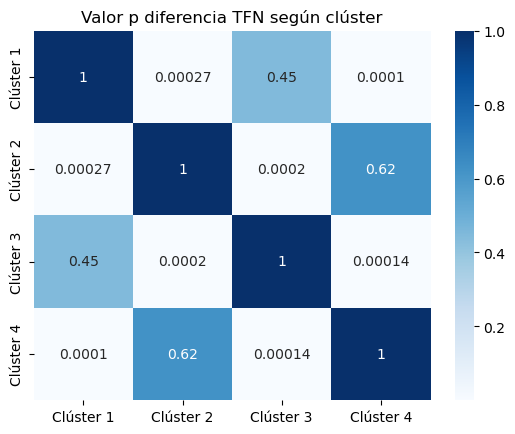

In [222]:
# Generar el heatmap
sns.heatmap(df, annot=True, cmap='Blues')

# Agregar el título y el subtítulo
plt.title('Valor p diferencia TFN según clúster')
#plt.suptitle('Optimización Grid Search')

# Mostrar el heatmap
plt.show()

In [200]:
# Obtener la importancia de las variables
#importance = bayes_cv_rf.best_estimator_.feature_importances_

# Obtener el estimador final del pipeline
best_estimator = bayes_cv_xgb.best_estimator_

# Obtener la importancia de las variables
importance = best_estimator.feature_importances_
print(len(importance))

62


In [201]:
# Verificar que las longitudes sean iguales
if len(X.columns) == len(importance):
    # Crear un DataFrame para visualizar la importancia de las variables
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importance
    })

    # Ordenar el DataFrame por importancia descendente
    importance_df = importance_df.sort_values('Importance', ascending=False)

    print(importance_df)
else:
    print("Error: Las longitudes de las columnas y la importancia de las variables no coinciden.")

   Feature  Importance
25  COMP26    0.024867
51  COMP52    0.024230
37  COMP38    0.022121
48  COMP49    0.021761
40  COMP41    0.021677
..     ...         ...
58  COMP59    0.010747
61  COMP62    0.010305
16  COMP17    0.009527
60  COMP61    0.008991
12  COMP13    0.008394

[62 rows x 2 columns]


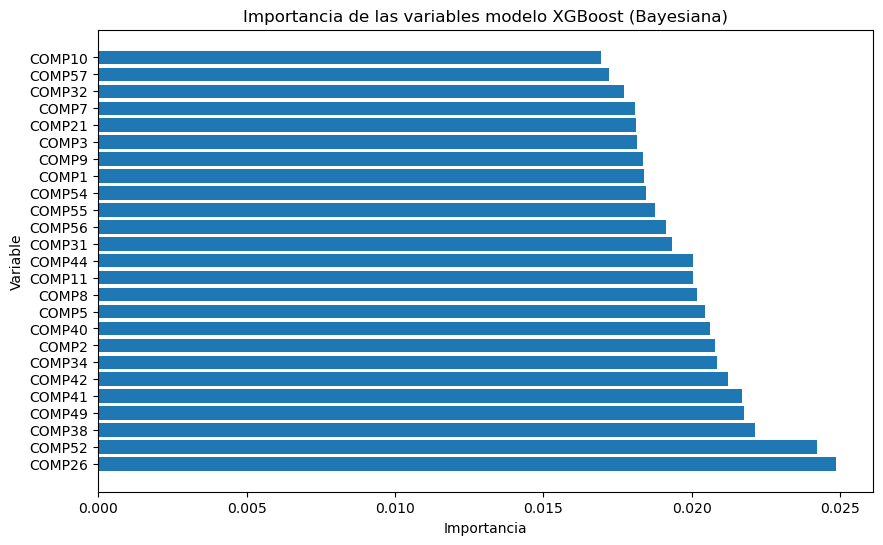

In [203]:
# Calcular la suma acumulada de importancia
importance_df['Cumulative Importance'] = importance_df['Importance'].cumsum()

# Filtrar las variables que sumen hasta el 50%
selected_variables = importance_df[importance_df['Cumulative Importance'] <= 0.5]

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(selected_variables['Feature'], selected_variables['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Importancia de las variables modelo XGBoost (Bayesiana)')

# Mostrar el gráfico
plt.show()

In [154]:
#bayes_cv_rf.optimizer_results_

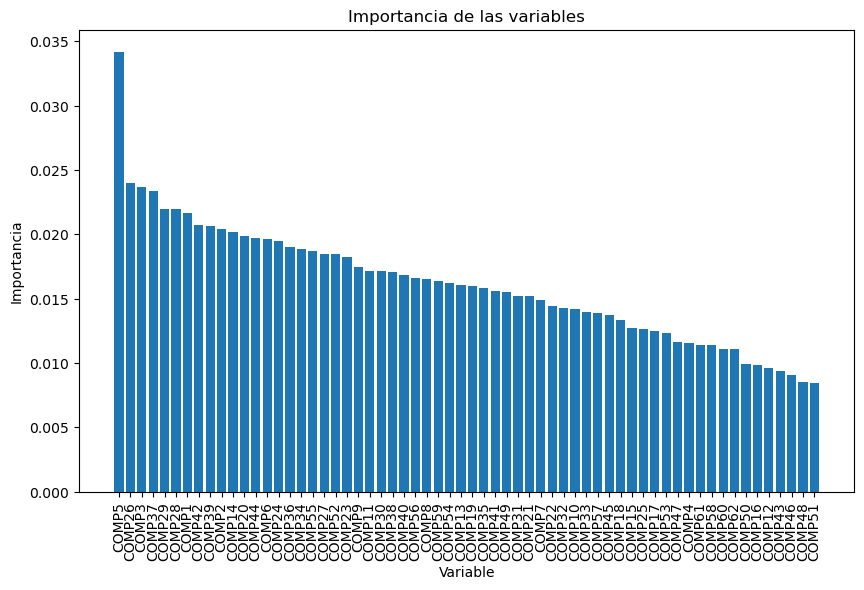

In [144]:
import matplotlib.pyplot as plt

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Variable')
plt.ylabel('Importancia')
plt.title('Importancia de las variables')

# Mostrar el gráfico
plt.show()


In [189]:
# Random Forest
import pickle

with open('rf.pkl', 'rb') as archivo:
    rf = pickle.load(archivo)
rf

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__max_depth': [None, 5, 10],
                         'classifier__n_estimators': [10, 50, 100],
                         'preprocessing__with_mean': [True, False]},
             scoring='roc_auc')

In [190]:
y_pred_rf = rf.predict(X_test)

In [223]:
import statsmodels.stats.proportion as prop
import statsmodels.api as sm

# Datos de ejemplo
n2 = total_positives(y_test, y_pred_bayes_rf)  # Tamaño de la muestra del cluster 2
p2 = false_negative_rate(y_test, y_pred_bayes_rf)  # Proporción del del cluster 2
n1 = total_positives(y_test, y_pred_rf)  # Tamaño de la muestra del del cluster 1
p1 = false_negative_rate(y_test, y_pred_rf)  # Proporción del del cluster 1

# Calcular los éxitos en cada grupo
successes1 = int(n1 * p1)
successes2 = int(n2 * p2)


# Realizar la prueba de hipótesis
z, p_value = sm.stats.proportions_ztest([successes1, 
                                         successes2], 
                                        [n1, 
                                         n2]
                                       )

# Calcular el intervalo de confianza
conf_int1 = prop.proportion_confint(successes1, 
                                    n1)

conf_int2 = prop.proportion_confint(successes2, 
                                    n2)

conf_int = (conf_int1[0] - conf_int2[1], conf_int1[1] - conf_int2[0])

# Imprimir los resultados
print("Prueba de hipótesis de diferencia de proporciones para TFN Random Forest vs XGBoost")
print("Diferencia de proporciones:", p1 - p2)
print("Valor p:", p_value)
print("Intervalo de confianza:", conf_int)

Prueba de hipótesis de diferencia de proporciones para TFN Random Forest vs XGBoost
Diferencia de proporciones: -0.002550369803621555
Valor p: 0.8008862060162423
Intervalo de confianza: (-0.030580064148102715, 0.025479324540859605)


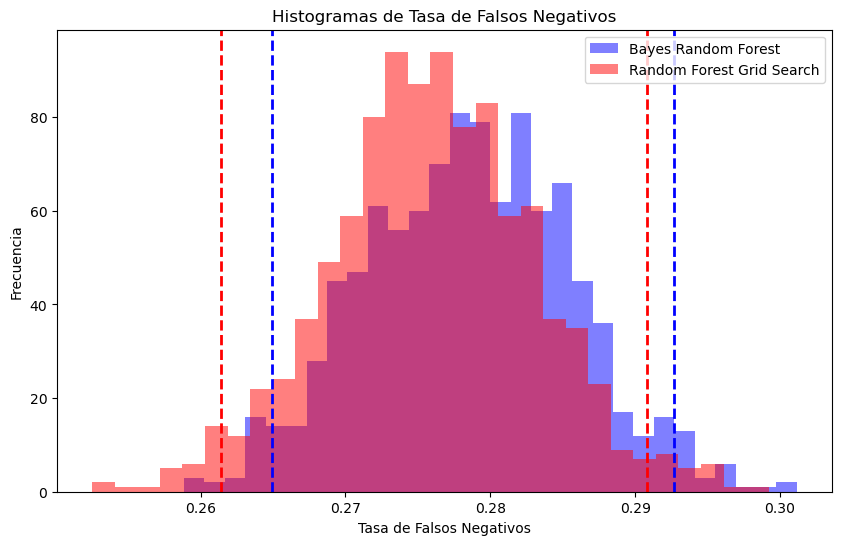

In [225]:
import matplotlib.pyplot as plt

# Definir el número de muestras bootstrap y el nivel de confianza
n_bootstrap = 1000
confidence_level = 0.95

# Realizar bootstrap para fns_bootstrap
fns_bootstrap = []
for _ in range(n_bootstrap):
    bootstrap_indices = np.random.choice(range(len(y_pred_bayes_rf)), size=len(y_pred_bayes_rf), replace=True)
    bootstrap_sample_ensemble = y_pred_bayes_rf[bootstrap_indices]
    bootstrap_sample_test = y_test[bootstrap_indices]
    fn_rate = false_negative_rate(bootstrap_sample_test, bootstrap_sample_ensemble)
    fns_bootstrap.append(fn_rate)

# Calcular el intervalo de confianza del 95% para fns_bootstrap
lower_bound_bs, upper_bound_bs = np.percentile(fns_bootstrap, [(1-confidence_level)/2*100, (1+confidence_level)/2*100])

# Realizar bootstrap para fns_bootstrap_rf
fns_bootstrap_rf = []
for _ in range(n_bootstrap):
    bootstrap_indices = np.random.choice(range(len(y_pred_rf)), size=len(y_pred_rf), replace=True)
    bootstrap_sample_ensemble = y_pred_rf[bootstrap_indices]
    bootstrap_sample_test = y_test[bootstrap_indices]
    fn_rate = false_negative_rate(bootstrap_sample_test, bootstrap_sample_ensemble)
    fns_bootstrap_rf.append(fn_rate)

# Calcular el intervalo de confianza del 95% para fns_bootstrap_rf
lower_bound_rf, upper_bound_rf = np.percentile(fns_bootstrap_rf, [(1-confidence_level)/2*100, (1+confidence_level)/2*100])

# Graficar los histogramas con intervalos de confianza
plt.figure(figsize=(10, 6))
plt.hist(fns_bootstrap, bins=30, color='blue', alpha=0.5, label='Bayes Random Forest')
plt.hist(fns_bootstrap_rf, bins=30, color='red', alpha=0.5, label='Random Forest Grid Search')
plt.axvline(x=lower_bound_bs, color='blue', linestyle='--', linewidth=2)
plt.axvline(x=upper_bound_bs, color='blue', linestyle='--', linewidth=2)
plt.axvline(x=lower_bound_rf, color='red', linestyle='--', linewidth=2)
plt.axvline(x=upper_bound_rf, color='red', linestyle='--', linewidth=2)
plt.xlabel('Tasa de Falsos Negativos')
plt.ylabel('Frecuencia')
plt.title('Histogramas de Tasa de Falsos Negativos')
plt.legend()
plt.show()


In [228]:
import statsmodels.stats.proportion as prop
import statsmodels.api as sm

# Datos de ejemplo
n2 = total_positives(y_test, y_pred_bayes_xgb)  # Tamaño de la muestra del cluster 2
p2 = false_negative_rate(y_test, y_pred_bayes_xgb)  # Proporción del del cluster 2
n1 = total_positives(y_test, y_pred_rf)  # Tamaño de la muestra del del cluster 1
p1 = false_negative_rate(y_test, y_pred_rf)  # Proporción del del cluster 1

# Calcular los éxitos en cada grupo
successes1 = int(n1 * p1)
successes2 = int(n2 * p2)


# Realizar la prueba de hipótesis
z, p_value = sm.stats.proportions_ztest([successes1, 
                                         successes2], 
                                        [n1, 
                                         n2]
                                       )

# Calcular el intervalo de confianza
conf_int1 = prop.proportion_confint(successes1, 
                                    n1)

conf_int2 = prop.proportion_confint(successes2, 
                                    n2)

conf_int = (conf_int1[0] - conf_int2[1], conf_int1[1] - conf_int2[0])

# Imprimir los resultados
print("Prueba de hipótesis de diferencia de proporciones para TFN Random Forest vs XGBoost")
print("Diferencia de proporciones:", p1 - p2)
print("Valor p:", p_value)
print("Intervalo de confianza:", conf_int)

Prueba de hipótesis de diferencia de proporciones para TFN Random Forest vs XGBoost
Diferencia de proporciones: 0.017852588625350663
Valor p: 0.07406493463420709
Intervalo de confianza: (-0.009843501006333522, 0.04554867825703485)


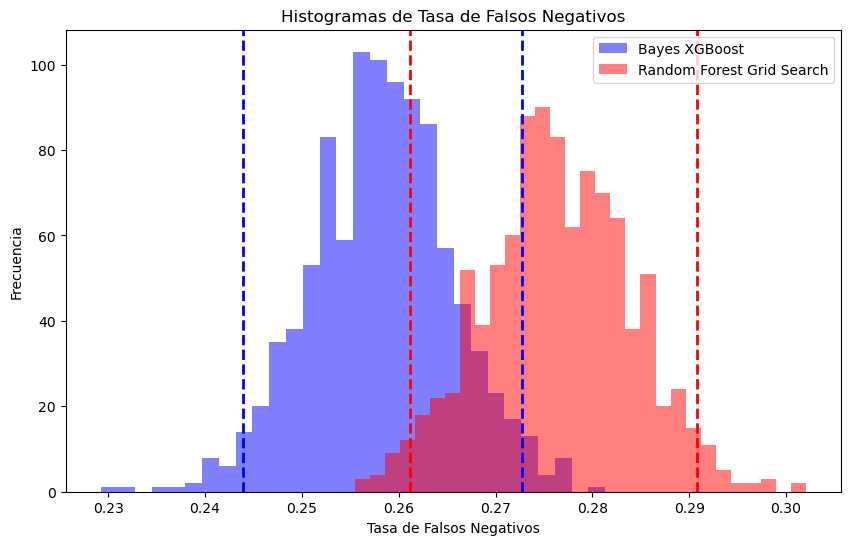

In [229]:
import matplotlib.pyplot as plt

# Definir el número de muestras bootstrap y el nivel de confianza
n_bootstrap = 1000
confidence_level = 0.95

# Realizar bootstrap para fns_bootstrap
fns_bootstrap = []
for _ in range(n_bootstrap):
    bootstrap_indices = np.random.choice(range(len(y_pred_bayes_xgb)), size=len(y_pred_bayes_xgb), replace=True)
    bootstrap_sample_ensemble = y_pred_bayes_xgb[bootstrap_indices]
    bootstrap_sample_test = y_test[bootstrap_indices]
    fn_rate = false_negative_rate(bootstrap_sample_test, bootstrap_sample_ensemble)
    fns_bootstrap.append(fn_rate)

# Calcular el intervalo de confianza del 95% para fns_bootstrap
lower_bound_bs, upper_bound_bs = np.percentile(fns_bootstrap, [(1-confidence_level)/2*100, (1+confidence_level)/2*100])

# Realizar bootstrap para fns_bootstrap_rf
fns_bootstrap_rf = []
for _ in range(n_bootstrap):
    bootstrap_indices = np.random.choice(range(len(y_pred_rf)), size=len(y_pred_rf), replace=True)
    bootstrap_sample_ensemble = y_pred_rf[bootstrap_indices]
    bootstrap_sample_test = y_test[bootstrap_indices]
    fn_rate = false_negative_rate(bootstrap_sample_test, bootstrap_sample_ensemble)
    fns_bootstrap_rf.append(fn_rate)

# Calcular el intervalo de confianza del 95% para fns_bootstrap_rf
lower_bound_rf, upper_bound_rf = np.percentile(fns_bootstrap_rf, [(1-confidence_level)/2*100, (1+confidence_level)/2*100])

# Graficar los histogramas con intervalos de confianza
plt.figure(figsize=(10, 6))
plt.hist(fns_bootstrap, bins=30, color='blue', alpha=0.5, label='Bayes XGBoost')
plt.hist(fns_bootstrap_rf, bins=30, color='red', alpha=0.5, label='Random Forest Grid Search')
plt.axvline(x=lower_bound_bs, color='blue', linestyle='--', linewidth=2)
plt.axvline(x=upper_bound_bs, color='blue', linestyle='--', linewidth=2)
plt.axvline(x=lower_bound_rf, color='red', linestyle='--', linewidth=2)
plt.axvline(x=upper_bound_rf, color='red', linestyle='--', linewidth=2)
plt.xlabel('Tasa de Falsos Negativos')
plt.ylabel('Frecuencia')
plt.title('Histogramas de Tasa de Falsos Negativos')
plt.legend()
plt.show()


In [230]:
import statsmodels.stats.proportion as prop
import statsmodels.api as sm

# Datos de ejemplo
n2 = total_positives(y_test, y_pred__bayes_cb)  # Tamaño de la muestra del cluster 2
p2 = false_negative_rate(y_test, y_pred__bayes_cb)  # Proporción del del cluster 2
n1 = total_positives(y_test, y_pred_rf)  # Tamaño de la muestra del del cluster 1
p1 = false_negative_rate(y_test, y_pred_rf)  # Proporción del del cluster 1

# Calcular los éxitos en cada grupo
successes1 = int(n1 * p1)
successes2 = int(n2 * p2)


# Realizar la prueba de hipótesis
z, p_value = sm.stats.proportions_ztest([successes1, 
                                         successes2], 
                                        [n1, 
                                         n2]
                                       )

# Calcular el intervalo de confianza
conf_int1 = prop.proportion_confint(successes1, 
                                    n1)

conf_int2 = prop.proportion_confint(successes2, 
                                    n2)

conf_int = (conf_int1[0] - conf_int2[1], conf_int1[1] - conf_int2[0])

# Imprimir los resultados
print("Prueba de hipótesis de diferencia de pr4.623708681321642e-09oporciones para TFN Random Forest vs CatBoost")
print("Diferencia de proporciones:", p1 - p2)
print("Valor p:", p_value)
print("Intervalo de confianza:", conf_int)

Prueba de hipótesis de diferencia de proporciones para TFN Random Forest vs CatBoost
Diferencia de proporciones: 0.057128283601122154
Valor p: 4.623708681321642e-09
Intervalo de confianza: (0.030186783485526836, 0.08406978371671747)


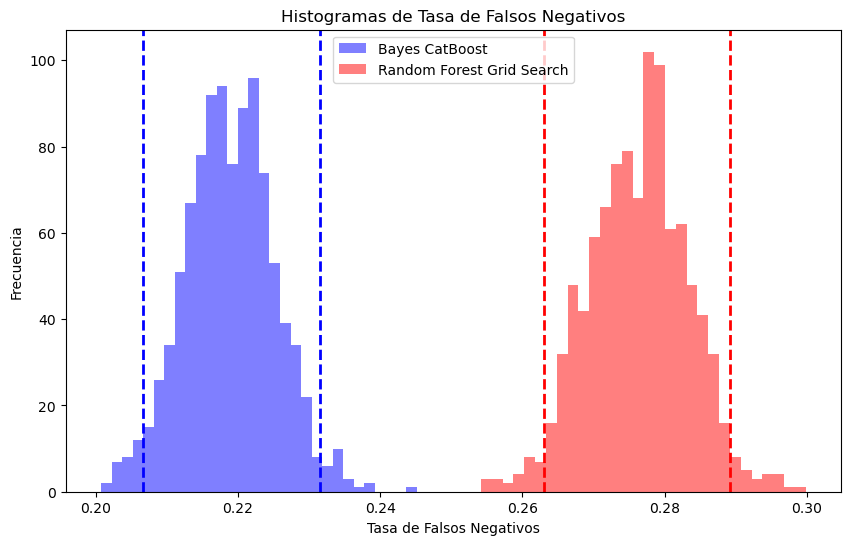

In [227]:
import matplotlib.pyplot as plt

# Definir el número de muestras bootstrap y el nivel de confianza
n_bootstrap = 1000
confidence_level = 0.95

# Realizar bootstrap para fns_bootstrap
fns_bootstrap = []
for _ in range(n_bootstrap):
    bootstrap_indices = np.random.choice(range(len(y_pred__bayes_cb)), size=len(y_pred__bayes_cb), replace=True)
    bootstrap_sample_ensemble = y_pred__bayes_cb[bootstrap_indices]
    bootstrap_sample_test = y_test[bootstrap_indices]
    fn_rate = false_negative_rate(bootstrap_sample_test, bootstrap_sample_ensemble)
    fns_bootstrap.append(fn_rate)

# Calcular el intervalo de confianza del 95% para fns_bootstrap
lower_bound_bs, upper_bound_bs = np.percentile(fns_bootstrap, [(1-confidence_level)/2*100, (1+confidence_level)/2*100])

# Realizar bootstrap para fns_bootstrap_rf
fns_bootstrap_rf = []
for _ in range(n_bootstrap):
    bootstrap_indices = np.random.choice(range(len(y_pred_rf)), size=len(y_pred_rf), replace=True)
    bootstrap_sample_ensemble = y_pred_rf[bootstrap_indices]
    bootstrap_sample_test = y_test[bootstrap_indices]
    fn_rate = false_negative_rate(bootstrap_sample_test, bootstrap_sample_ensemble)
    fns_bootstrap_rf.append(fn_rate)

# Calcular el intervalo de confianza del 95% para fns_bootstrap_rf
lower_bound_rf, upper_bound_rf = np.percentile(fns_bootstrap_rf, [(1-confidence_level)/2*100, (1+confidence_level)/2*100])

# Graficar los histogramas con intervalos de confianza
plt.figure(figsize=(10, 6))
plt.hist(fns_bootstrap, bins=30, color='blue', alpha=0.5, label='Bayes CatBoost')
plt.hist(fns_bootstrap_rf, bins=30, color='red', alpha=0.5, label='Random Forest Grid Search')
plt.axvline(x=lower_bound_bs, color='blue', linestyle='--', linewidth=2)
plt.axvline(x=upper_bound_bs, color='blue', linestyle='--', linewidth=2)
plt.axvline(x=lower_bound_rf, color='red', linestyle='--', linewidth=2)
plt.axvline(x=upper_bound_rf, color='red', linestyle='--', linewidth=2)
plt.xlabel('Tasa de Falsos Negativos')
plt.ylabel('Frecuencia')
plt.title('Histogramas de Tasa de Falsos Negativos')
plt.legend()
plt.show()


In [231]:
data = {
    '': ['Random Forest GS', 'Random Forest Bayes', 'XGBoost Bayes', 'CatBoost Bayes'],
    'Random Forest GS':   [1,          0.8008,      0.0740,   4.6237e-9],
    'Random Forest Bayes':[0.8008,   1,             0.0415,      9.8839e-10],
    'XGBoost Bayes':      [0.0740,   0.0415,      1,             4.5156e-5],
    'CatBoost Bayes':     [4.6237e-9,   9.8839e-10,      4.5156e-5,   1]
}

df = pd.DataFrame(data)
df.set_index('', inplace=True)

df


,Random Forest GS,Random Forest Bayes,XGBoost Bayes,CatBoost Bayes
,,,,
Random Forest GS,1.000000e+00,8.008000e-01,0.074000,4.623700e-09
Random Forest Bayes,8.008000e-01,1.000000e+00,0.041500,9.883900e-10
XGBoost Bayes,7.400000e-02,4.150000e-02,1.000000,4.515600e-05
CatBoost Bayes,4.623700e-09,9.883900e-10,0.000045,1.000000e+00


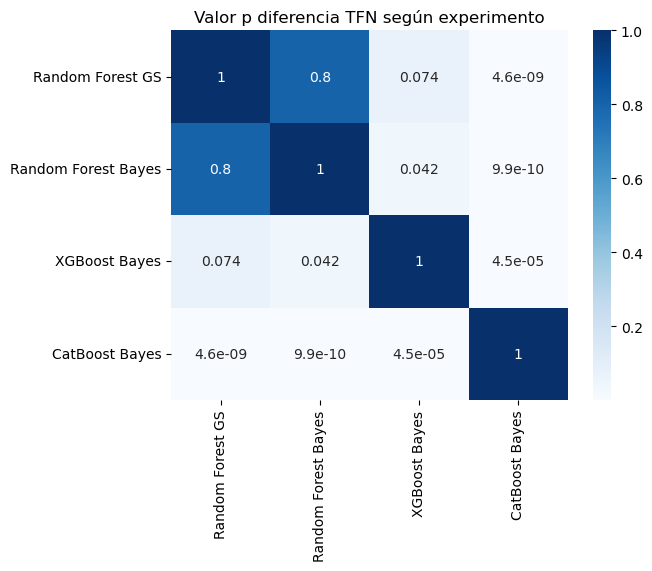

In [233]:

# Generar el heatmap
sns.heatmap(df, annot=True, cmap='Blues')

# Agregar el título y el subtítulo
plt.title('Valor p diferencia TFN según experimento')
#plt.suptitle('Optimización Grid Search')

# Mostrar el heatmap
plt.show()